In [11]:
import math,time,linearmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns


In [12]:
discount_map = {
    0: 100,
    1: 10,
    5: 50,
    7: 70,
    9: 90
}
type_map={
    "topsales":0,
    "newsales":1,
    "presales":2
}
cate_map = {        #以下可以混合參考
    1: "文學小說",
    2: "商業理財",
    3: "藝術設計",
    4: "人文社科",
    6: "自然科普",
    7: "心理勵志",
    #
    8: "醫療保健",
    9: "飲食",
    10: "生活風格",
    11: "旅遊",
    12: "宗教命理",
    13: "親子教養",
    #獨立看
    14: "青少年文學",
    15: "輕小說",       #
    16: "漫畫、圖文書",  #

    #以下不計
    17: "語言學習",
    18: "考試用書",     #
    19: "電腦資訊",     #
    20: "專業出版品",    #
    22: "影視偶像",
    24: "國中小參考書"    #
}


In [13]:
fangzhi = pd.read_csv("publisher_data/fangzhi.csv")
how = pd.read_csv("publisher_data/how.csv")
jioujing = pd.read_csv("publisher_data/jioujing.csv")
lonely = pd.read_csv("publisher_data/lonely.csv")
shianjiue = pd.read_csv("publisher_data/shianjiue.csv")
yuanshen = pd.read_csv("publisher_data/yuanshen.csv")
times = pd.read_csv("publisher_data/times.csv")

In [14]:
def cleandata(df):
    df['discount'] = df["discount"].fillna(0).astype(str)
    temp = []
    for _ in df['discount']:
        if math.ceil(float(_)) in  discount_map:
            temp.append(discount_map[math.ceil(float(_))])
        else:
            temp.append(math.ceil(float(_)))
    df['discount'] = temp
    df['publishDate'] = pd.to_datetime(df['publication_date'], format='%Y-%m-%d')
    return df

In [15]:
fangzhi = cleandata(fangzhi)
how = cleandata(how)
jioujing = cleandata(jioujing)
lonely = cleandata(lonely)
shianjiue = cleandata(shianjiue)
yuanshen = cleandata(yuanshen)
times = cleandata(times)

In [16]:
dfs = [fangzhi,how,jioujing,lonely,shianjiue,yuanshen,times]
labels = ['fangzhi','how','jioujing','lonely','shianjiue','yuanshen','times']

In [17]:
# caculate original price
for i in range(7):
    dfs[i]['price'] = dfs[i]['price'].fillna(0).astype(str)
    temp = []
    for index,row in dfs[i].iterrows():
       temp.append((float(row['price'])/row['discount']) * 100)
    dfs[i]['original_price'] = temp
    

In [24]:
dfss = pd.concat(dfs)
dfss

,title,author,publisher,publication_date,discount,price,publishDate,original_price,electronic_version
0,巨人的筆記【隨書附「摘要生活大小事」記錄別冊】：用記錄改寫人生的方法,金翼漢,方智,2024-05-01,79,300,2024-05-01,379.746835,False
1,巨人的筆記【隨書附「摘要生活大小事」記錄別冊】：用記錄改寫人生的方法 (電子書),金翼漢,方智,2024-05-01,100,228,2024-05-01,228.000000,True
2,一切安好：結合醫學、肯定句與直覺力的身心靈完全療法,"蒙娜麗莎．舒茲,露易絲‧賀",方智,2024-05-01,79,363,2024-05-01,459.493671,False
3,一切安好：結合醫學、肯定句與直覺力的身心靈完全療法 (電子書),"蒙娜麗莎．舒茲,露易絲‧賀",方智,2024-05-01,100,290,2024-05-01,290.000000,True
4,先別急著吃棉花糖【附棉花糖心法中英抄寫別冊】,"喬辛‧迪‧波沙達,愛倫‧辛格",方智,2024-04-01,79,244,2024-04-01,308.860759,False
...,...,...,...,...,...,...,...,...,...
7559,孫子兵法,徐瑜,時報出版,1972-11-10,79,79,1972-11-10,100.000000,False
7560,未帶地圖的旅人--蕭乾回憶錄,蕭乾,時報出版,1900-01-01,79,276,1900-01-01,349.367089,False
7561,蔣方良傳--淒美榮耀異鄉路,王美玉,時報出版,1900-01-01,79,158,1900-01-01,200.000000,False
7562,典藏艋舺歲月,張蒼松,時報出版,1900-01-01,79,252,1900-01-01,318.987342,False


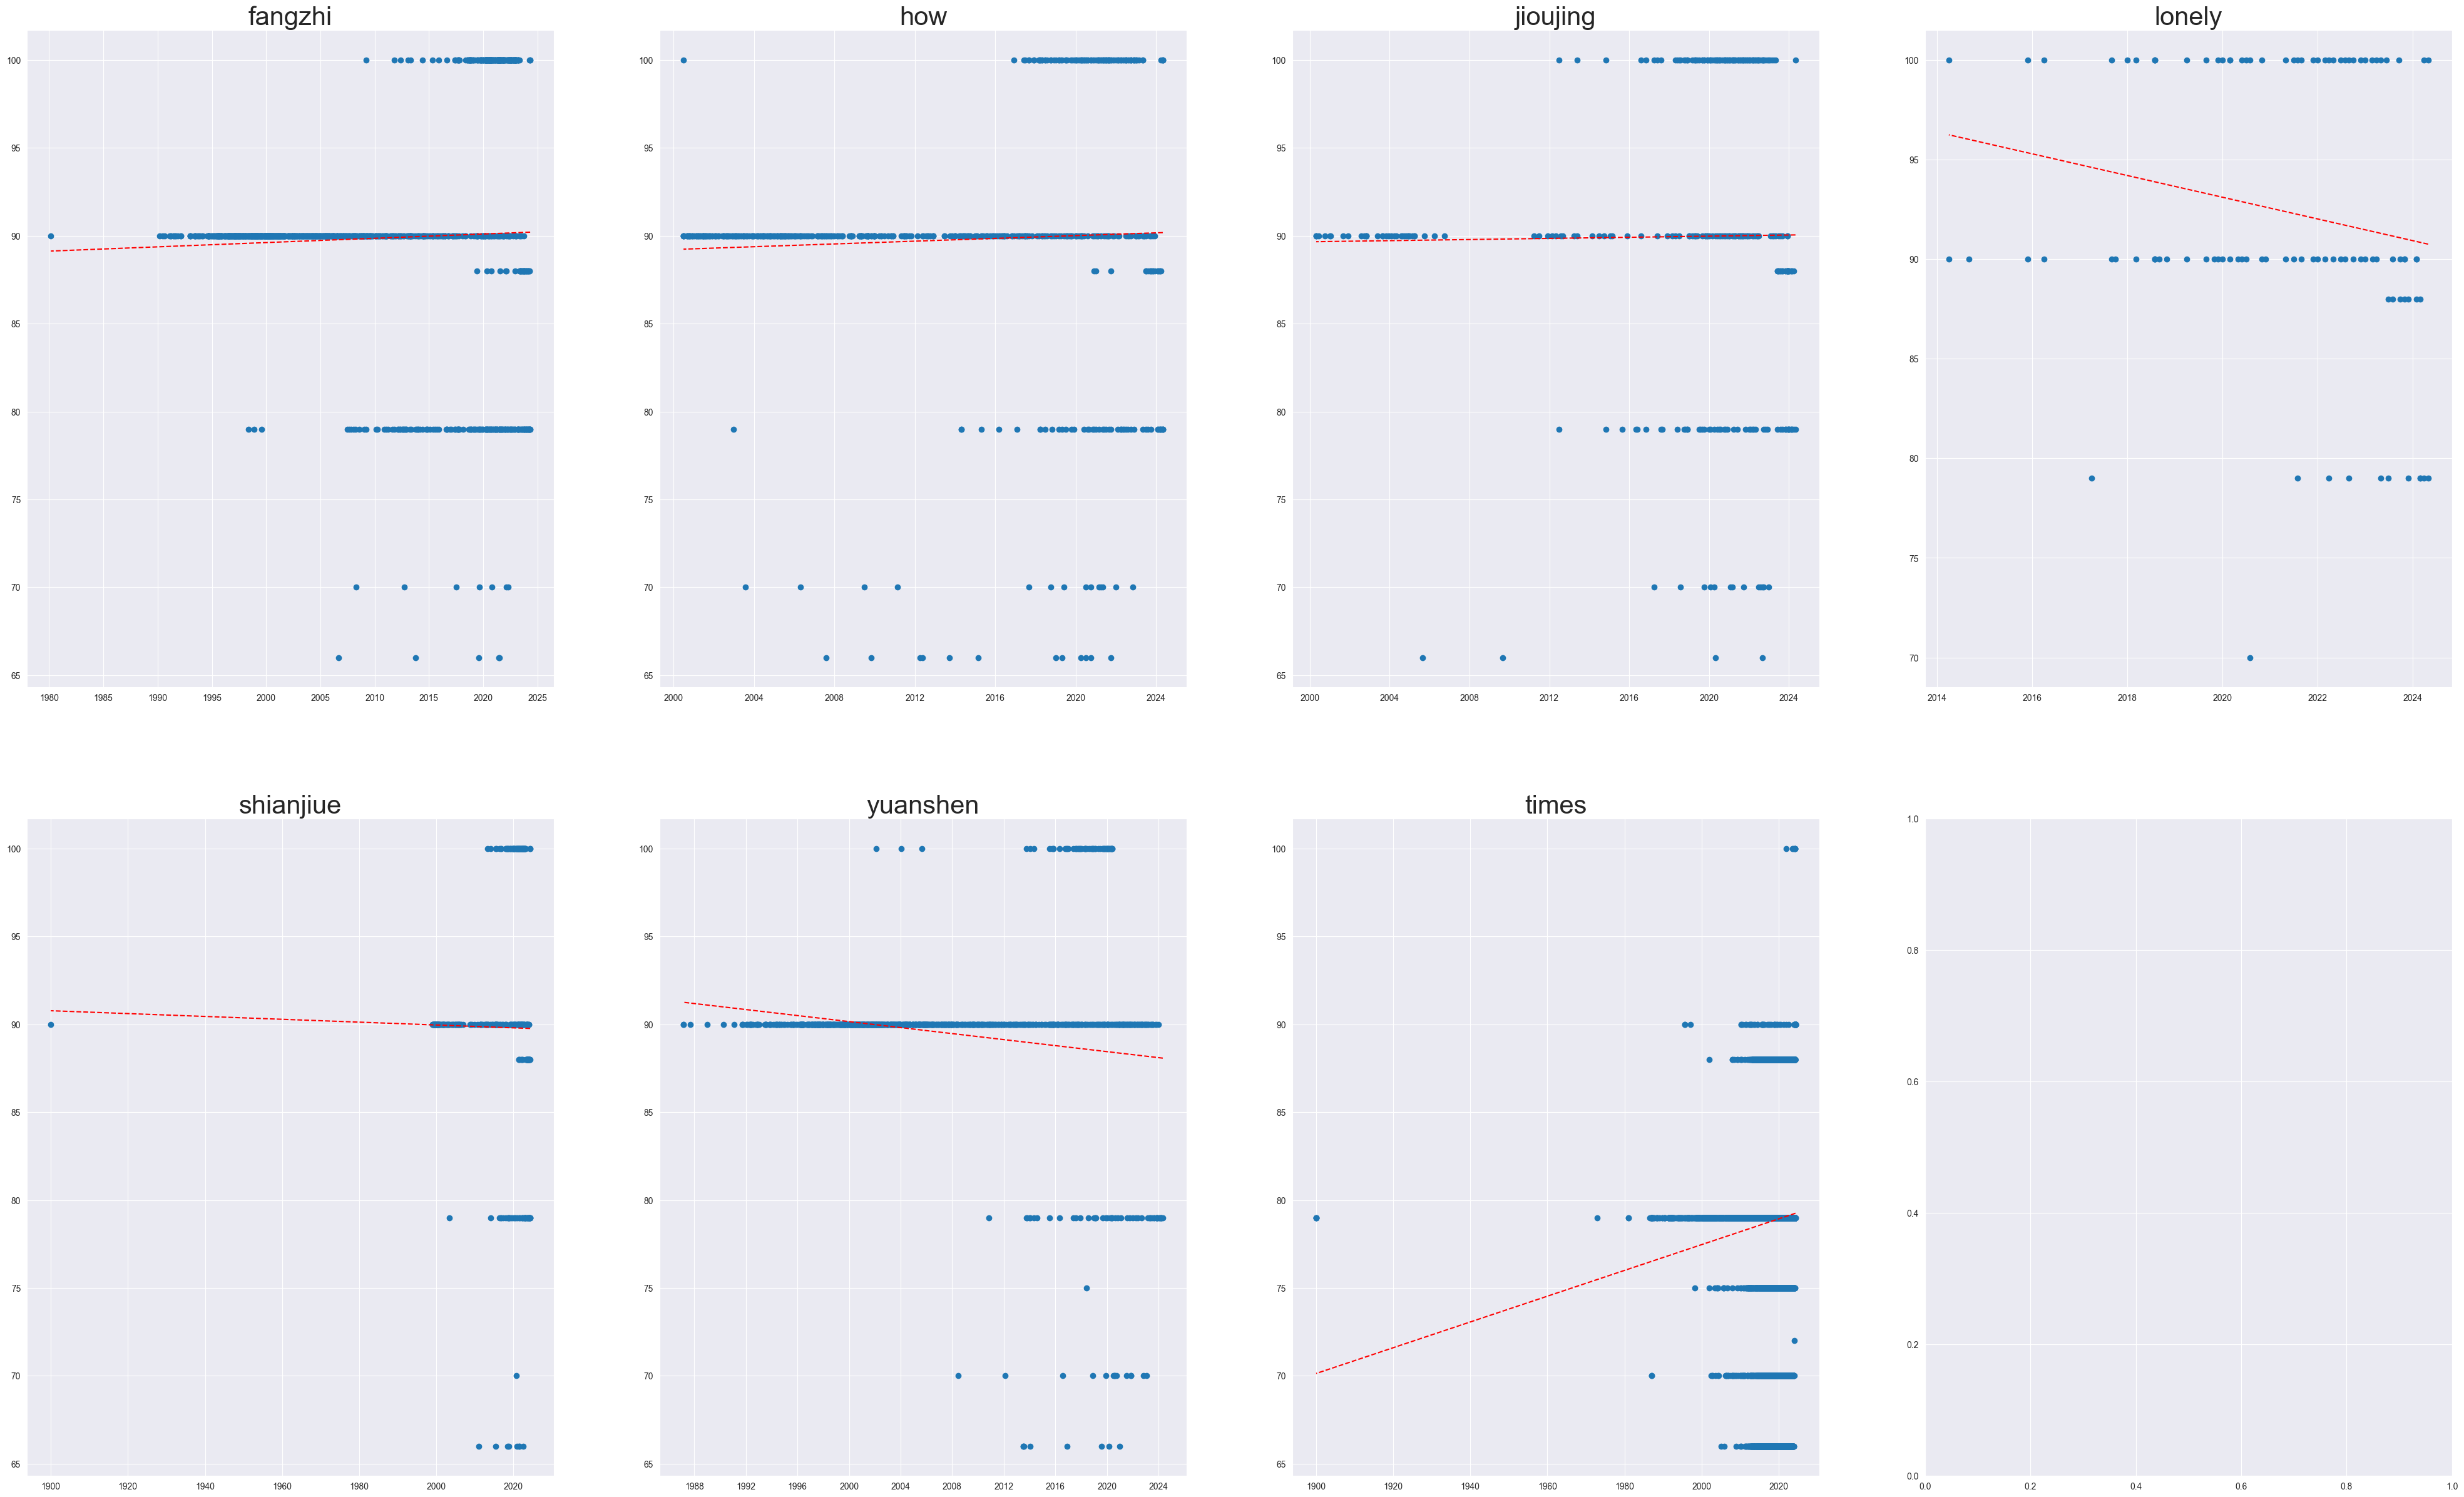

In [18]:
fig,axs = plt.subplots(2,4,figsize=(50,30))
for i in range(7):
    axs[i//4,i%4].scatter(dfs[i]['publishDate'],dfs[i]['discount'])
    axs[i//4,i%4].set_title(labels[i],fontsize=30)
    x = mdates.date2num(dfs[i]['publishDate'])
    y = dfs[i]['discount']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i//4,i%4].plot(x, p(x), "r--")
# plt.show()
plt.savefig("./pics/publisher_discount.png")

In [19]:
def detect_electronic_version(df):
    mask1 = df['title'].str.contains("電子書")
    mask2 = df['title'].str.contains("電子版")
    mask3 = df['title'].str.contains("電子閱讀")
    mask4 = df['title'].str.contains("電子")
    mask5 = df['title'].str.contains("電子書")
    mask6 = df['title'].str.contains("電子版")
    mask7 = df['title'].str.contains("電子閱讀")
    mask8 = df['title'].str.contains("電子")
    mask = mask1 | mask2 | mask3 | mask4 | mask5 | mask6 | mask7 | mask8
    df['electronic_version'] = mask
    return df


In [20]:
for i in range(7):
    dfs[i] = detect_electronic_version(dfs[i])

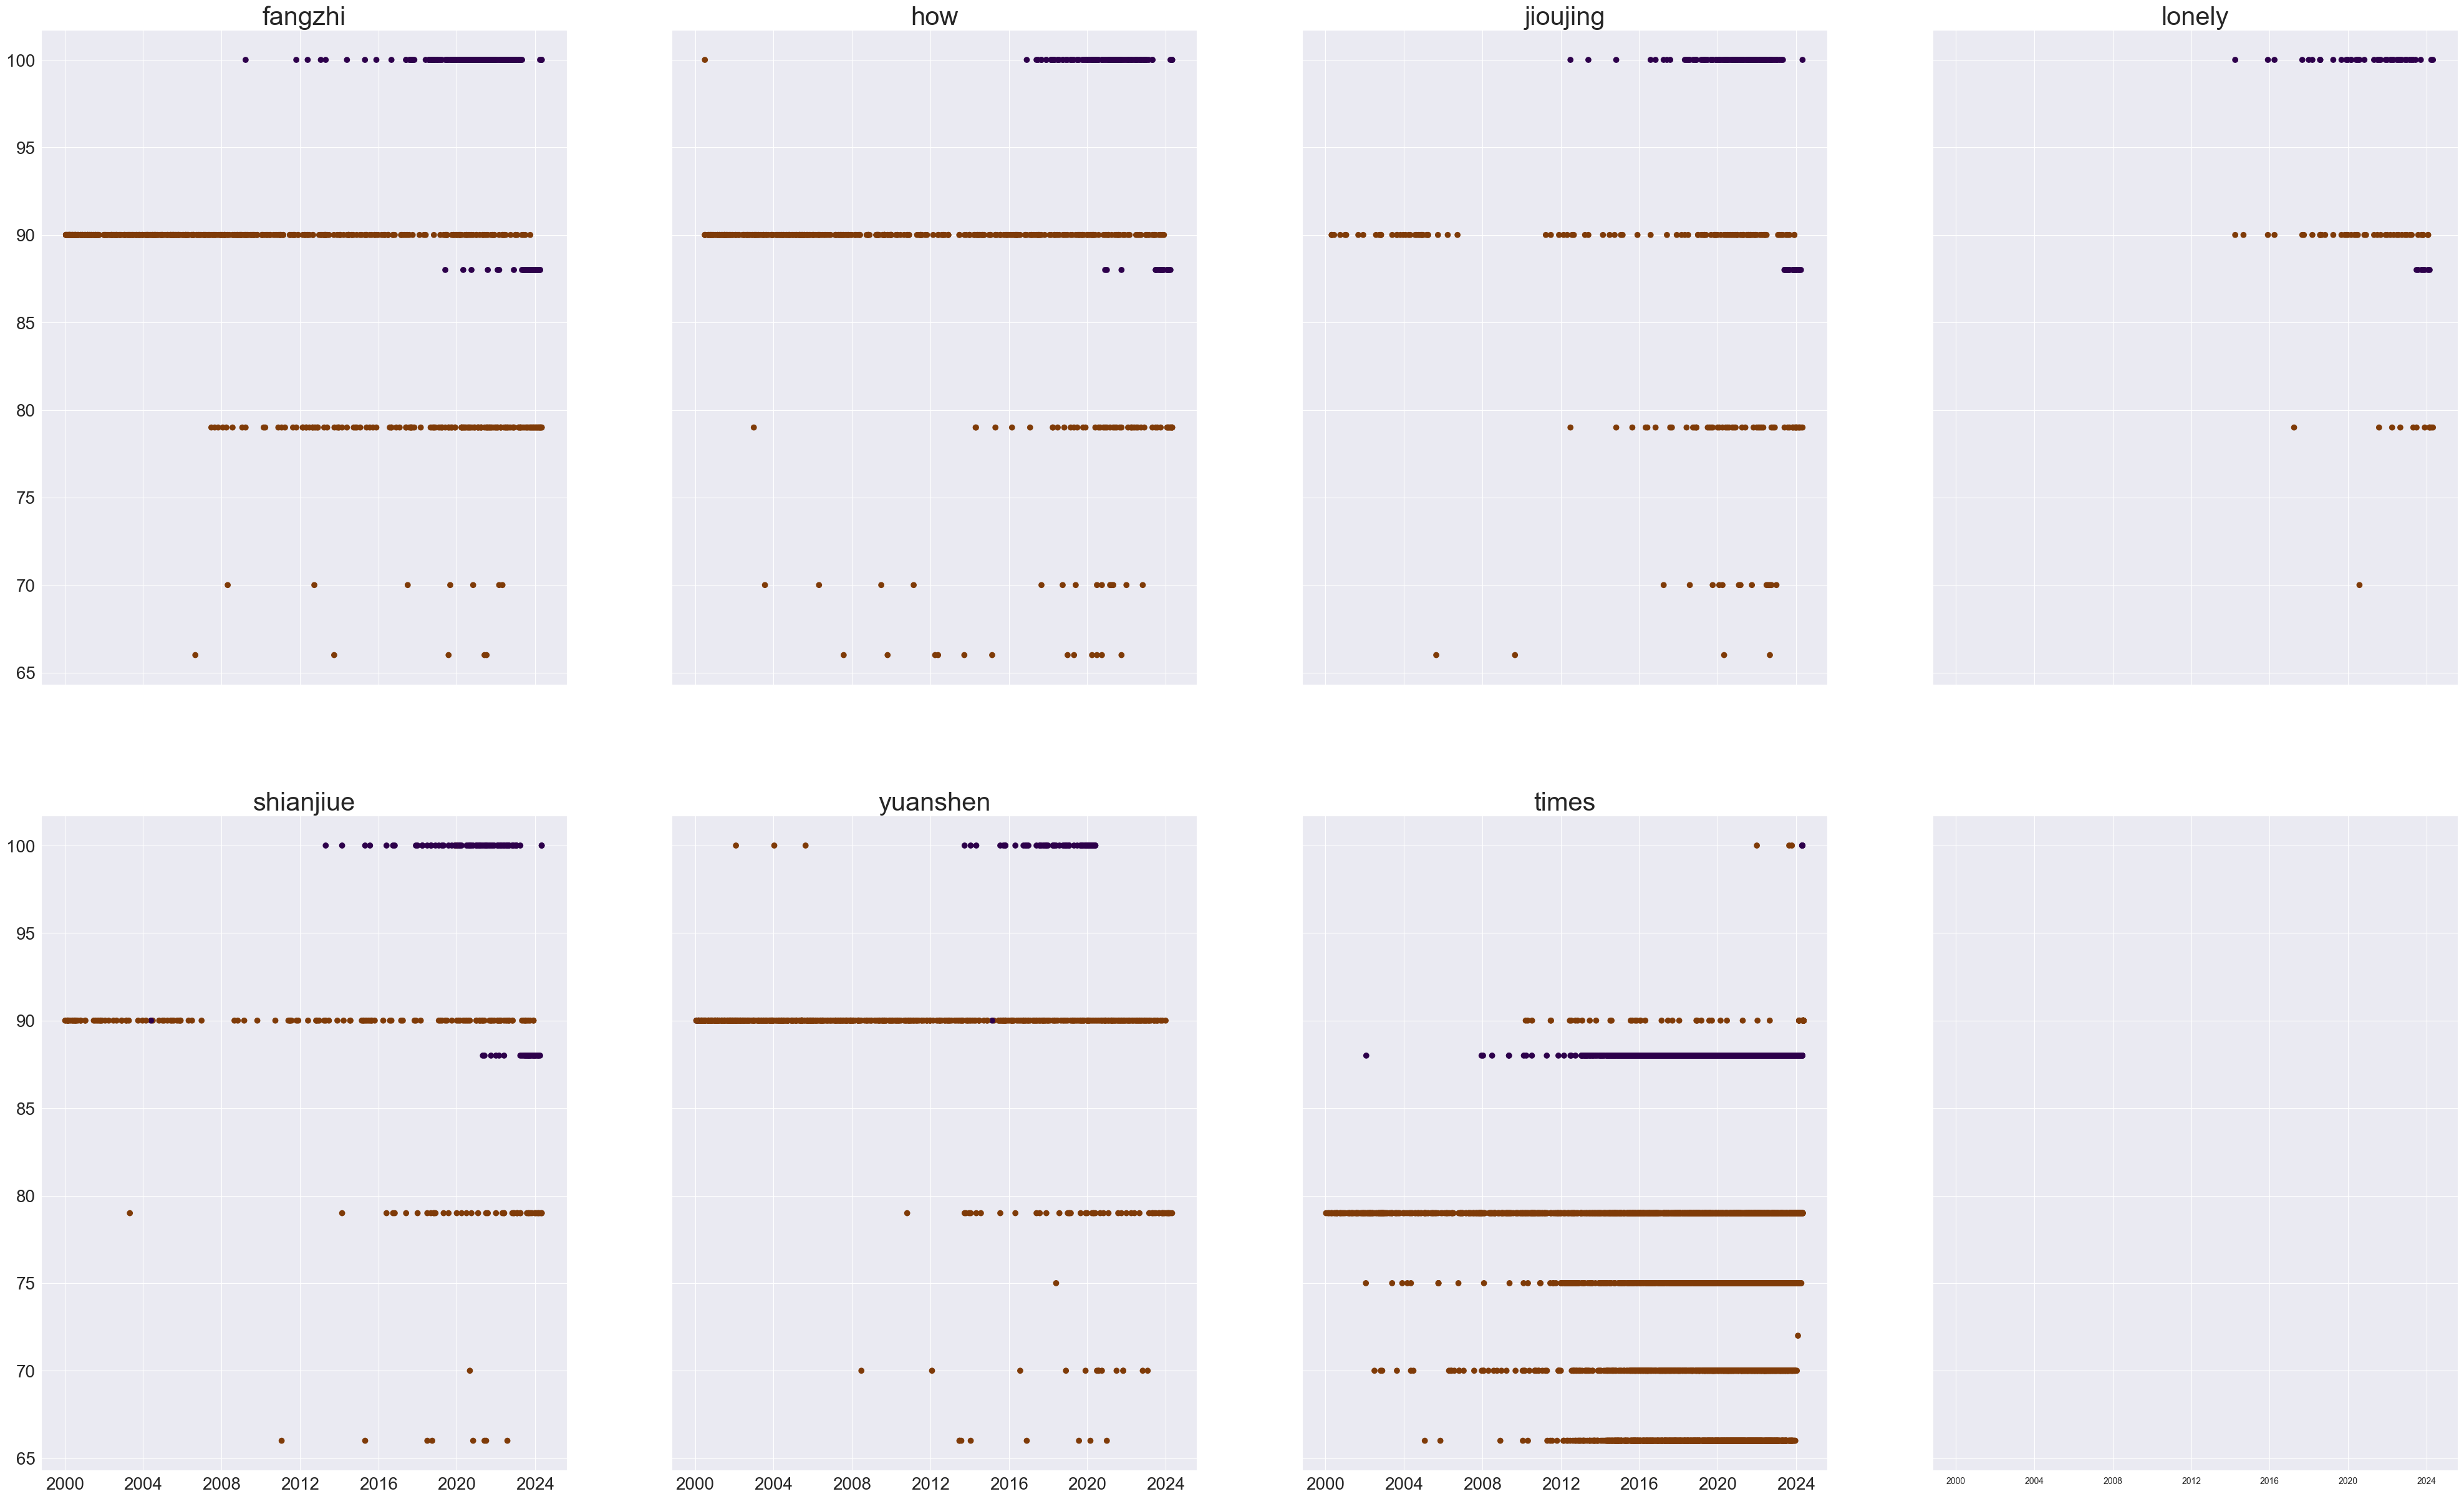

In [23]:
fig, axs = plt.subplots(2, 4, figsize=(50, 30),sharex=True,sharey=True)
for i in range(7):
    #limit after 2000
    axs[i//4, i%4].scatter(dfs[i][dfs[i]['publishDate']>datetime.datetime(2000,1,1)]['publishDate'], dfs[i][dfs[i]['publishDate']>datetime.datetime(2000,1,1)]['discount'], c = dfs[i][dfs[i]['publishDate']>datetime.datetime(2000,1,1)]['electronic_version'], cmap='PuOr')
    
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)
    

plt.savefig("./pics/ebook_ver_publisher_discount.png")

In [1]:
fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharey=True,sharex=True)
for i in range(7):
    scatter = axs[i//4, i%4].scatter(dfs[i]['publishDate'], dfs[i]['discount'], c = dfs[i]['electronic_version'], cmap='bwr')
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes

# Add a colorbar to the figure
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label('Electronic Version', rotation=270, labelpad=20, fontsize=20)
cbar.ax.tick_params(labelsize=20)  # Change the size of the colorbar tick labels
cbar.set_ticklabels(['is_paper', 'is_ebook'])  # Set the tick labels to 'is_paper' and 'is_ebook'
plt.suptitle('Publisher Discount and Electronic Version', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount.png")

NameError: name 'plt' is not defined

In [14]:
ebookdfs = [i[i['electronic_version']==True] for i in dfs ]

In [15]:
for i in range(len(ebookdfs)):
    ebookdfs[i] = ebookdfs[i].reset_index(drop=True)
    temp = []
    
    for j in range(len(ebookdfs[i])):
        temp.append(ebookdfs[i].iloc[j]['title'].replace(" (電子書)",""))
    ebookdfs[i]['title'] = temp

In [16]:
    
for i in range(len(ebookdfs)):
    temp1 = []
    temp2 = []
    temp3 = []
    for j in range(len(ebookdfs[i])):
        try:
            temp1.append((dfs[i][dfs[i]['title']==ebookdfs[i].iloc[j]['title']].iloc[0]['price']))
        except:
            temp1.append(None)
        try:
            temp2.append((dfs[i][dfs[i]['title']==ebookdfs[i].iloc[j]['title']].iloc[0]['original_price']))
        except:
            temp2.append(None)
        try:
            temp3.append((dfs[i][dfs[i]['title']==ebookdfs[i].iloc[j]['title']].iloc[0]['discount']))
        except:
            temp3.append(None)
    ebookdfs[i]['paper_price'] = temp1
    ebookdfs[i]['paper_original_price'] = temp2
    ebookdfs[i]['paper_discount'] = temp3
    
    temp = []
    temp1 = []
    for j in range(len(ebookdfs[i])):
        if ebookdfs[i]['paper_price'][j] is not None:
            temp.append((float(ebookdfs[i]['price'][j])/float(ebookdfs[i]['paper_price'][j]))*100)
        else:
            temp.append(None)     
        if ebookdfs[i]['paper_discount'][j] is not None and ebookdfs[i]['discount'][j] is not None and ebookdfs[i]['paper_price'][j] is not None:
            temp1.append(((float(ebookdfs[i]['price'][j])/float(ebookdfs[i]['discount'][j]))
                          /(float(ebookdfs[i]['paper_price'][j])/float(ebookdfs[i]['paper_discount'][j])))*100)
        else:
            temp1.append(None)
    ebookdfs[i]['discount_rate_of_ebook'] = temp
    ebookdfs[i]['discount_rate_of_ebook_in_origion'] = temp1
    
    
        

In [17]:
ebookdfs[0]

,title,author,publisher,publication_date,discount,price,publishDate,original_price,electronic_version,paper_price,paper_original_price,paper_discount,discount_rate_of_ebook,discount_rate_of_ebook_in_origion
0,巨人的筆記【隨書附「摘要生活大小事」記錄別冊】：用記錄改寫人生的方法,金翼漢,方智,2024-05-01,100,228,2024-05-01,228.000000,True,300,379.746835,79.0,76.000000,60.040000
1,一切安好：結合醫學、肯定句與直覺力的身心靈完全療法,"蒙娜麗莎．舒茲,露易絲‧賀",方智,2024-05-01,100,290,2024-05-01,290.000000,True,363,459.493671,79.0,79.889807,63.112948
2,先別急著吃棉花糖【附棉花糖心法中英抄寫別冊】,"喬辛‧迪‧波沙達,愛倫‧辛格",方智,2024-04-01,88,190,2024-04-01,215.909091,True,244,308.860759,79.0,77.868852,69.904993
3,當整理卡關時：獨居、同住都能實踐的零雜物生活,Phyllis,方智,2024-04-01,100,301,2024-04-01,301.000000,True,339,429.113924,79.0,88.790560,70.144543
4,讓奇蹟發生的技術：每個感謝，都會回到你身上,武田雙雲,方智,2024-04-01,88,209,2024-04-01,237.500000,True,268,339.240506,79.0,77.985075,70.009328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,怦然心動的人生整理魔法2：實踐篇‧解惑篇,近藤麻理惠,方智,2013-04-25,100,175,2013-04-25,175.000000,True,None,NaN,NaN,NaN,NaN
215,NLP之父3天改變你的一生,理查．班德勒、艾里西歐．羅伯堤、歐文．菲茲帕特里克,方智,2013-01-24,100,168,2013-01-24,168.000000,True,216,240.000000,90.0,77.777778,70.000000
216,零雜物：讓生活輕盈，讓心更自由,Phyllis,方智,2012-05-24,100,205,2012-05-24,205.000000,True,234,260.000000,90.0,87.606838,78.846154
217,怦然心動的人生整理魔法,近藤麻理惠,方智,2011-10-25,100,175,2011-10-25,175.000000,True,197,249.367089,79.0,88.832487,70.177665


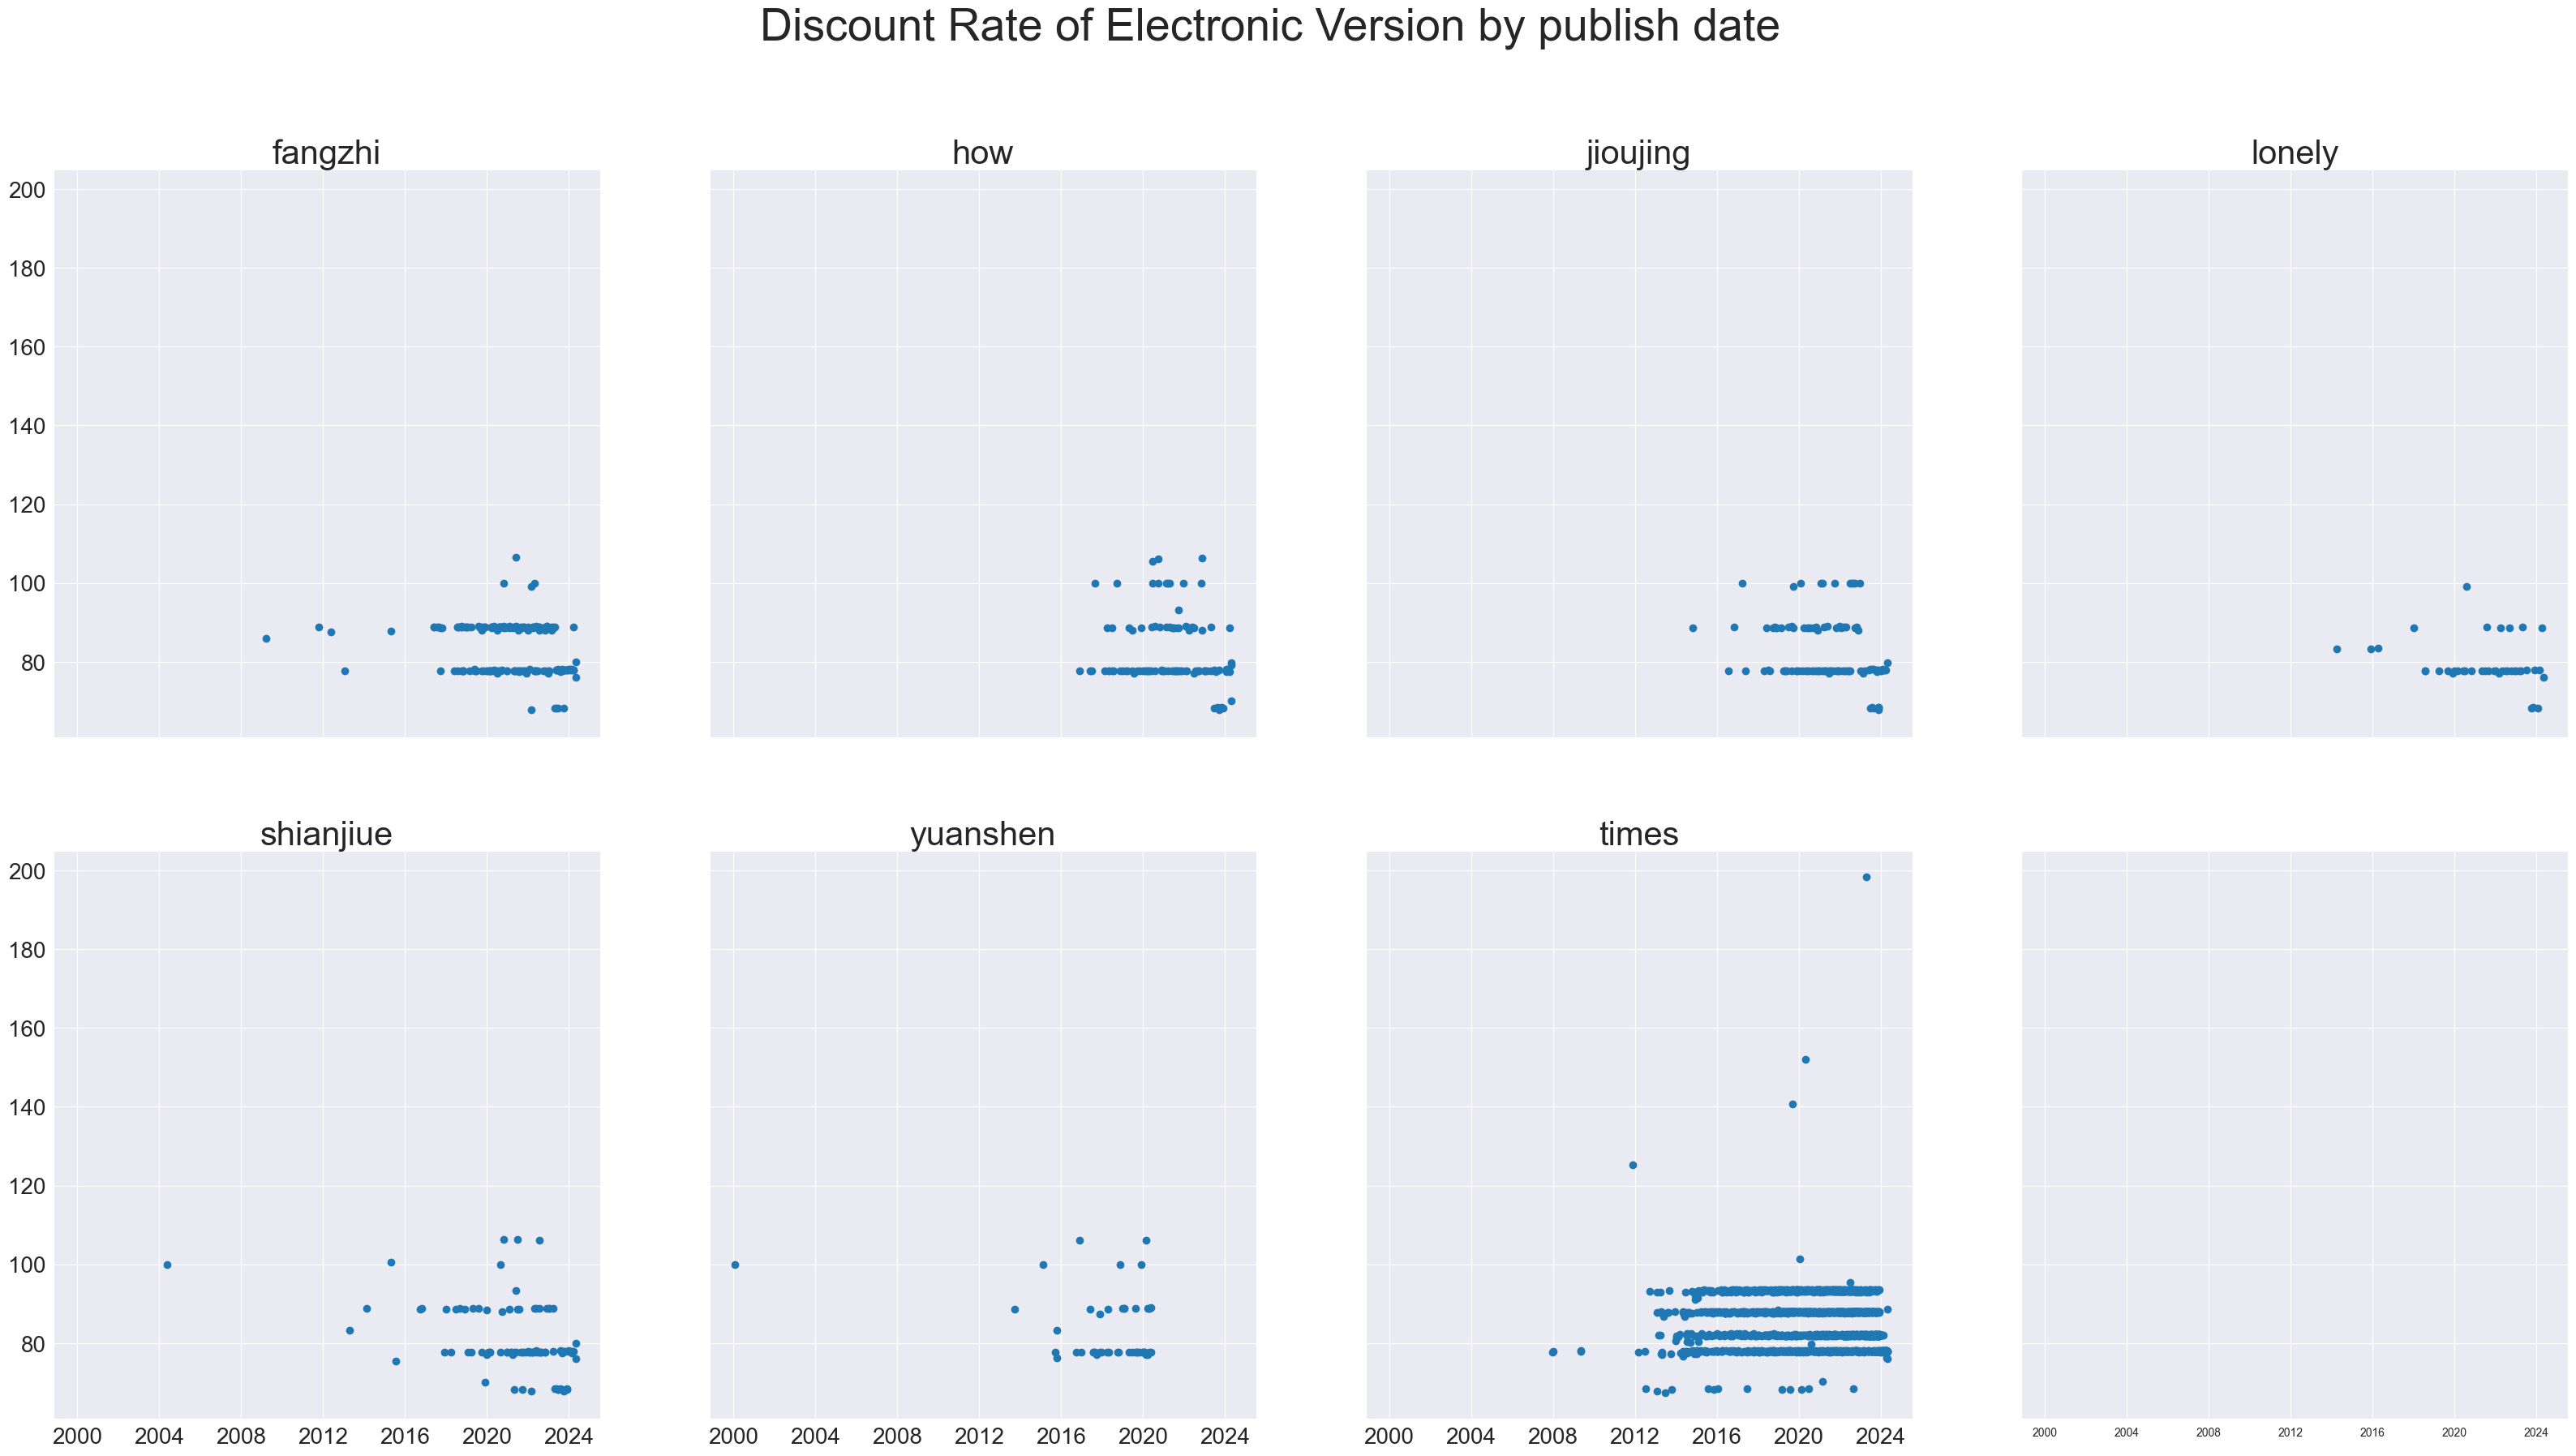

In [18]:
fig, axs = plt.subplots(2,4, figsize=(40, 20),sharey=True,sharex=True)
for i in range(7):
    scatter = axs[i//4, i%4].scatter(ebookdfs[i]['publishDate'], ebookdfs[i]['discount_rate_of_ebook'])
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
fig.suptitle('Discount Rate of Electronic Version by publish date', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount_rate.png")

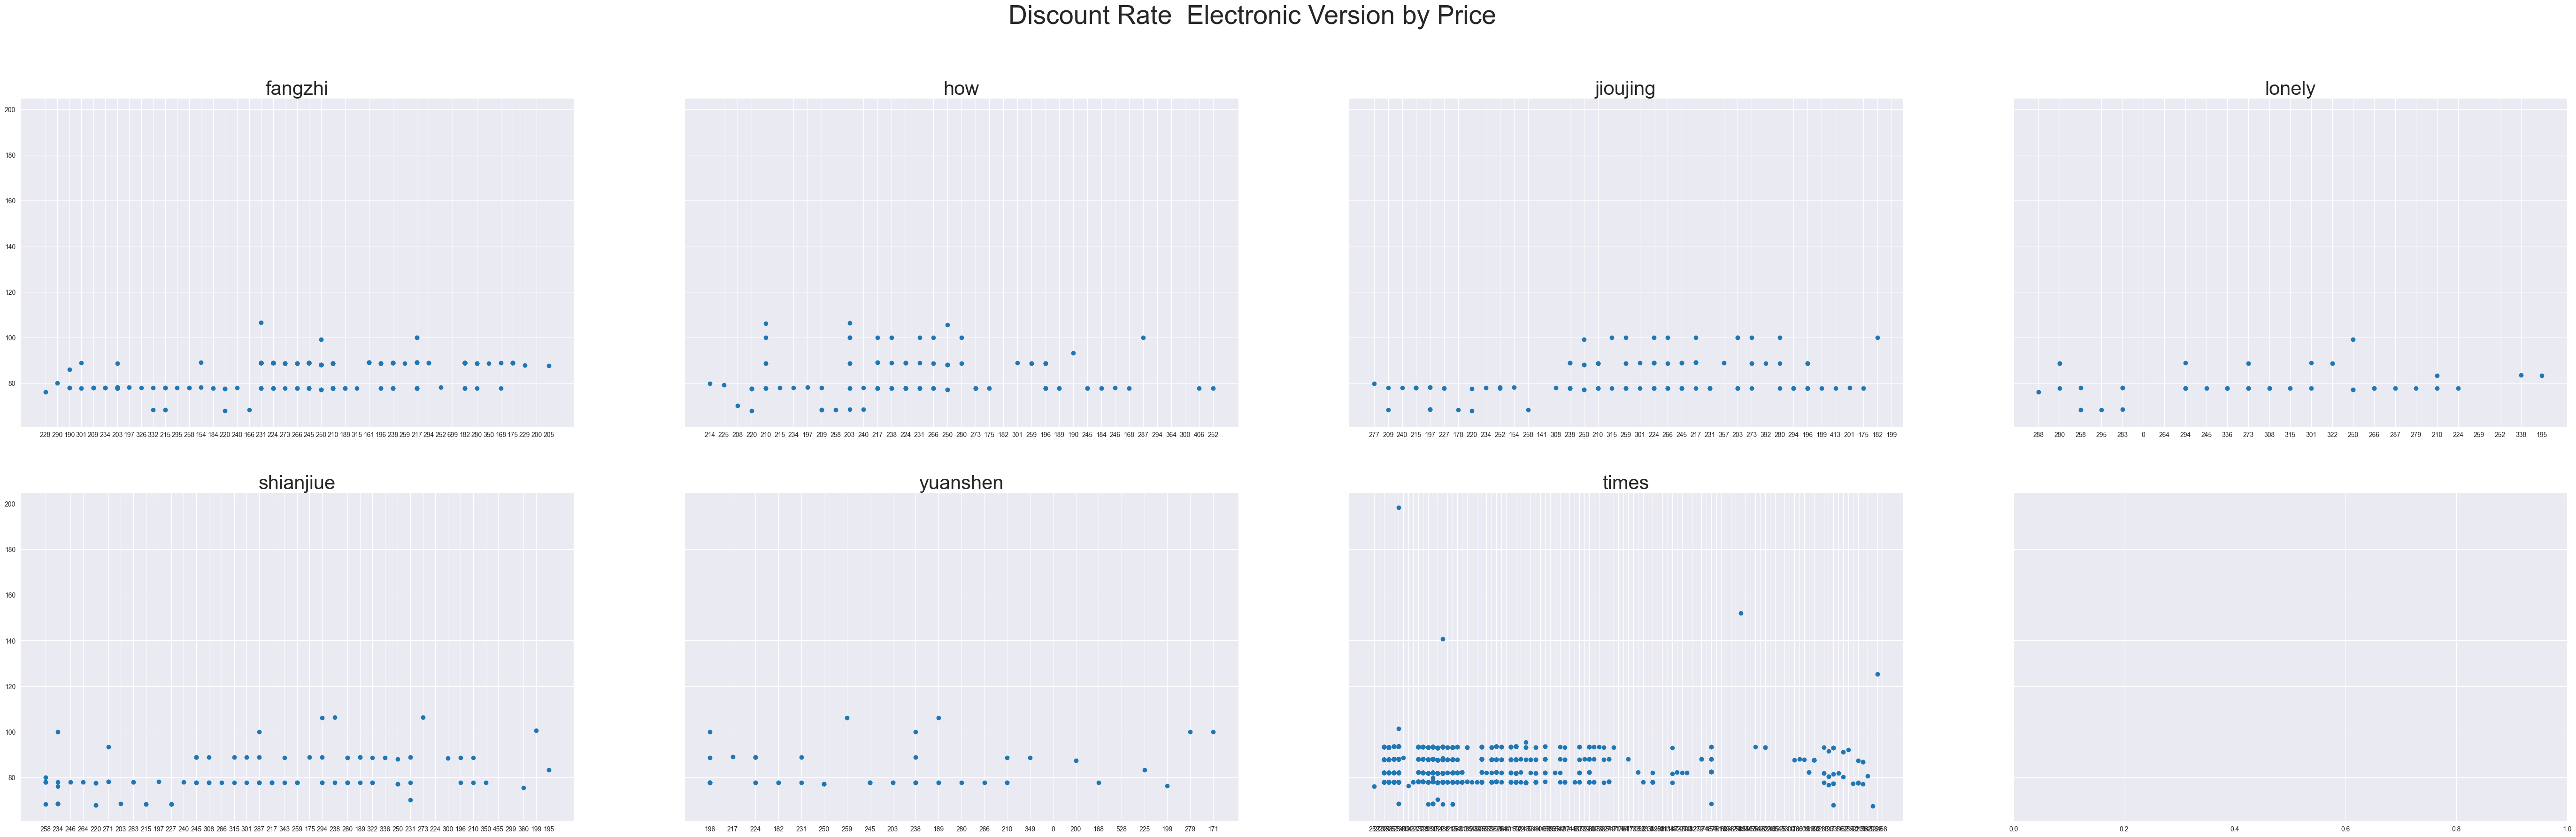

In [19]:
fig, axs = plt.subplots(2, 4, figsize=(70, 20),sharey=True)
for i in range(7):
    scatter = axs[i//4, i%4].scatter(ebookdfs[i]['price'], ebookdfs[i]['discount_rate_of_ebook'])
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=10)  # Change the size of the numbers on the axes
fig.suptitle('Discount Rate  Electronic Version by Price', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount_rate_by_price.png")

In [20]:
dfs[1]


,title,author,publisher,publication_date,discount,price,publishDate,original_price,electronic_version
0,四夠教養法，養出溫暖聰明的孩子【限量親簽版】,陳子蘭,如何,2024-05-01,79,284,2024-05-01,359.493671,False
1,四夠教養法，養出溫暖聰明的孩子,陳子蘭,如何,2024-05-01,79,284,2024-05-01,359.493671,False
2,居家布置的心理法則：一點點變動就能創造幸福,高原美由紀,如何,2024-05-01,79,268,2024-05-01,339.240506,False
3,居家布置的心理法則：一點點變動就能創造幸福 (電子書),高原美由紀,如何,2024-05-01,100,214,2024-05-01,214.000000,True
4,四夠教養法，養出溫暖聰明的孩子 (電子書),陳子蘭,如何,2024-05-01,100,225,2024-05-01,225.000000,True
...,...,...,...,...,...,...,...,...,...
544,你一定可以通過推薦甄選,鄭清榮,如何,2000-07-05,90,225,2000-07-05,250.000000,False
545,幽默就很迷人：讓你大受歡迎的說話術,南琦,如何,2000-07-05,90,180,2000-07-05,200.000000,False
546,這個字，英文你會說嗎?學校學不到的實用英語,講談社國際,如何,2000-07-01,90,180,2000-07-01,200.000000,False
547,你也可以說一漂亮英語名句,遠山顯,如何,2000-07-01,90,180,2000-07-01,200.000000,False


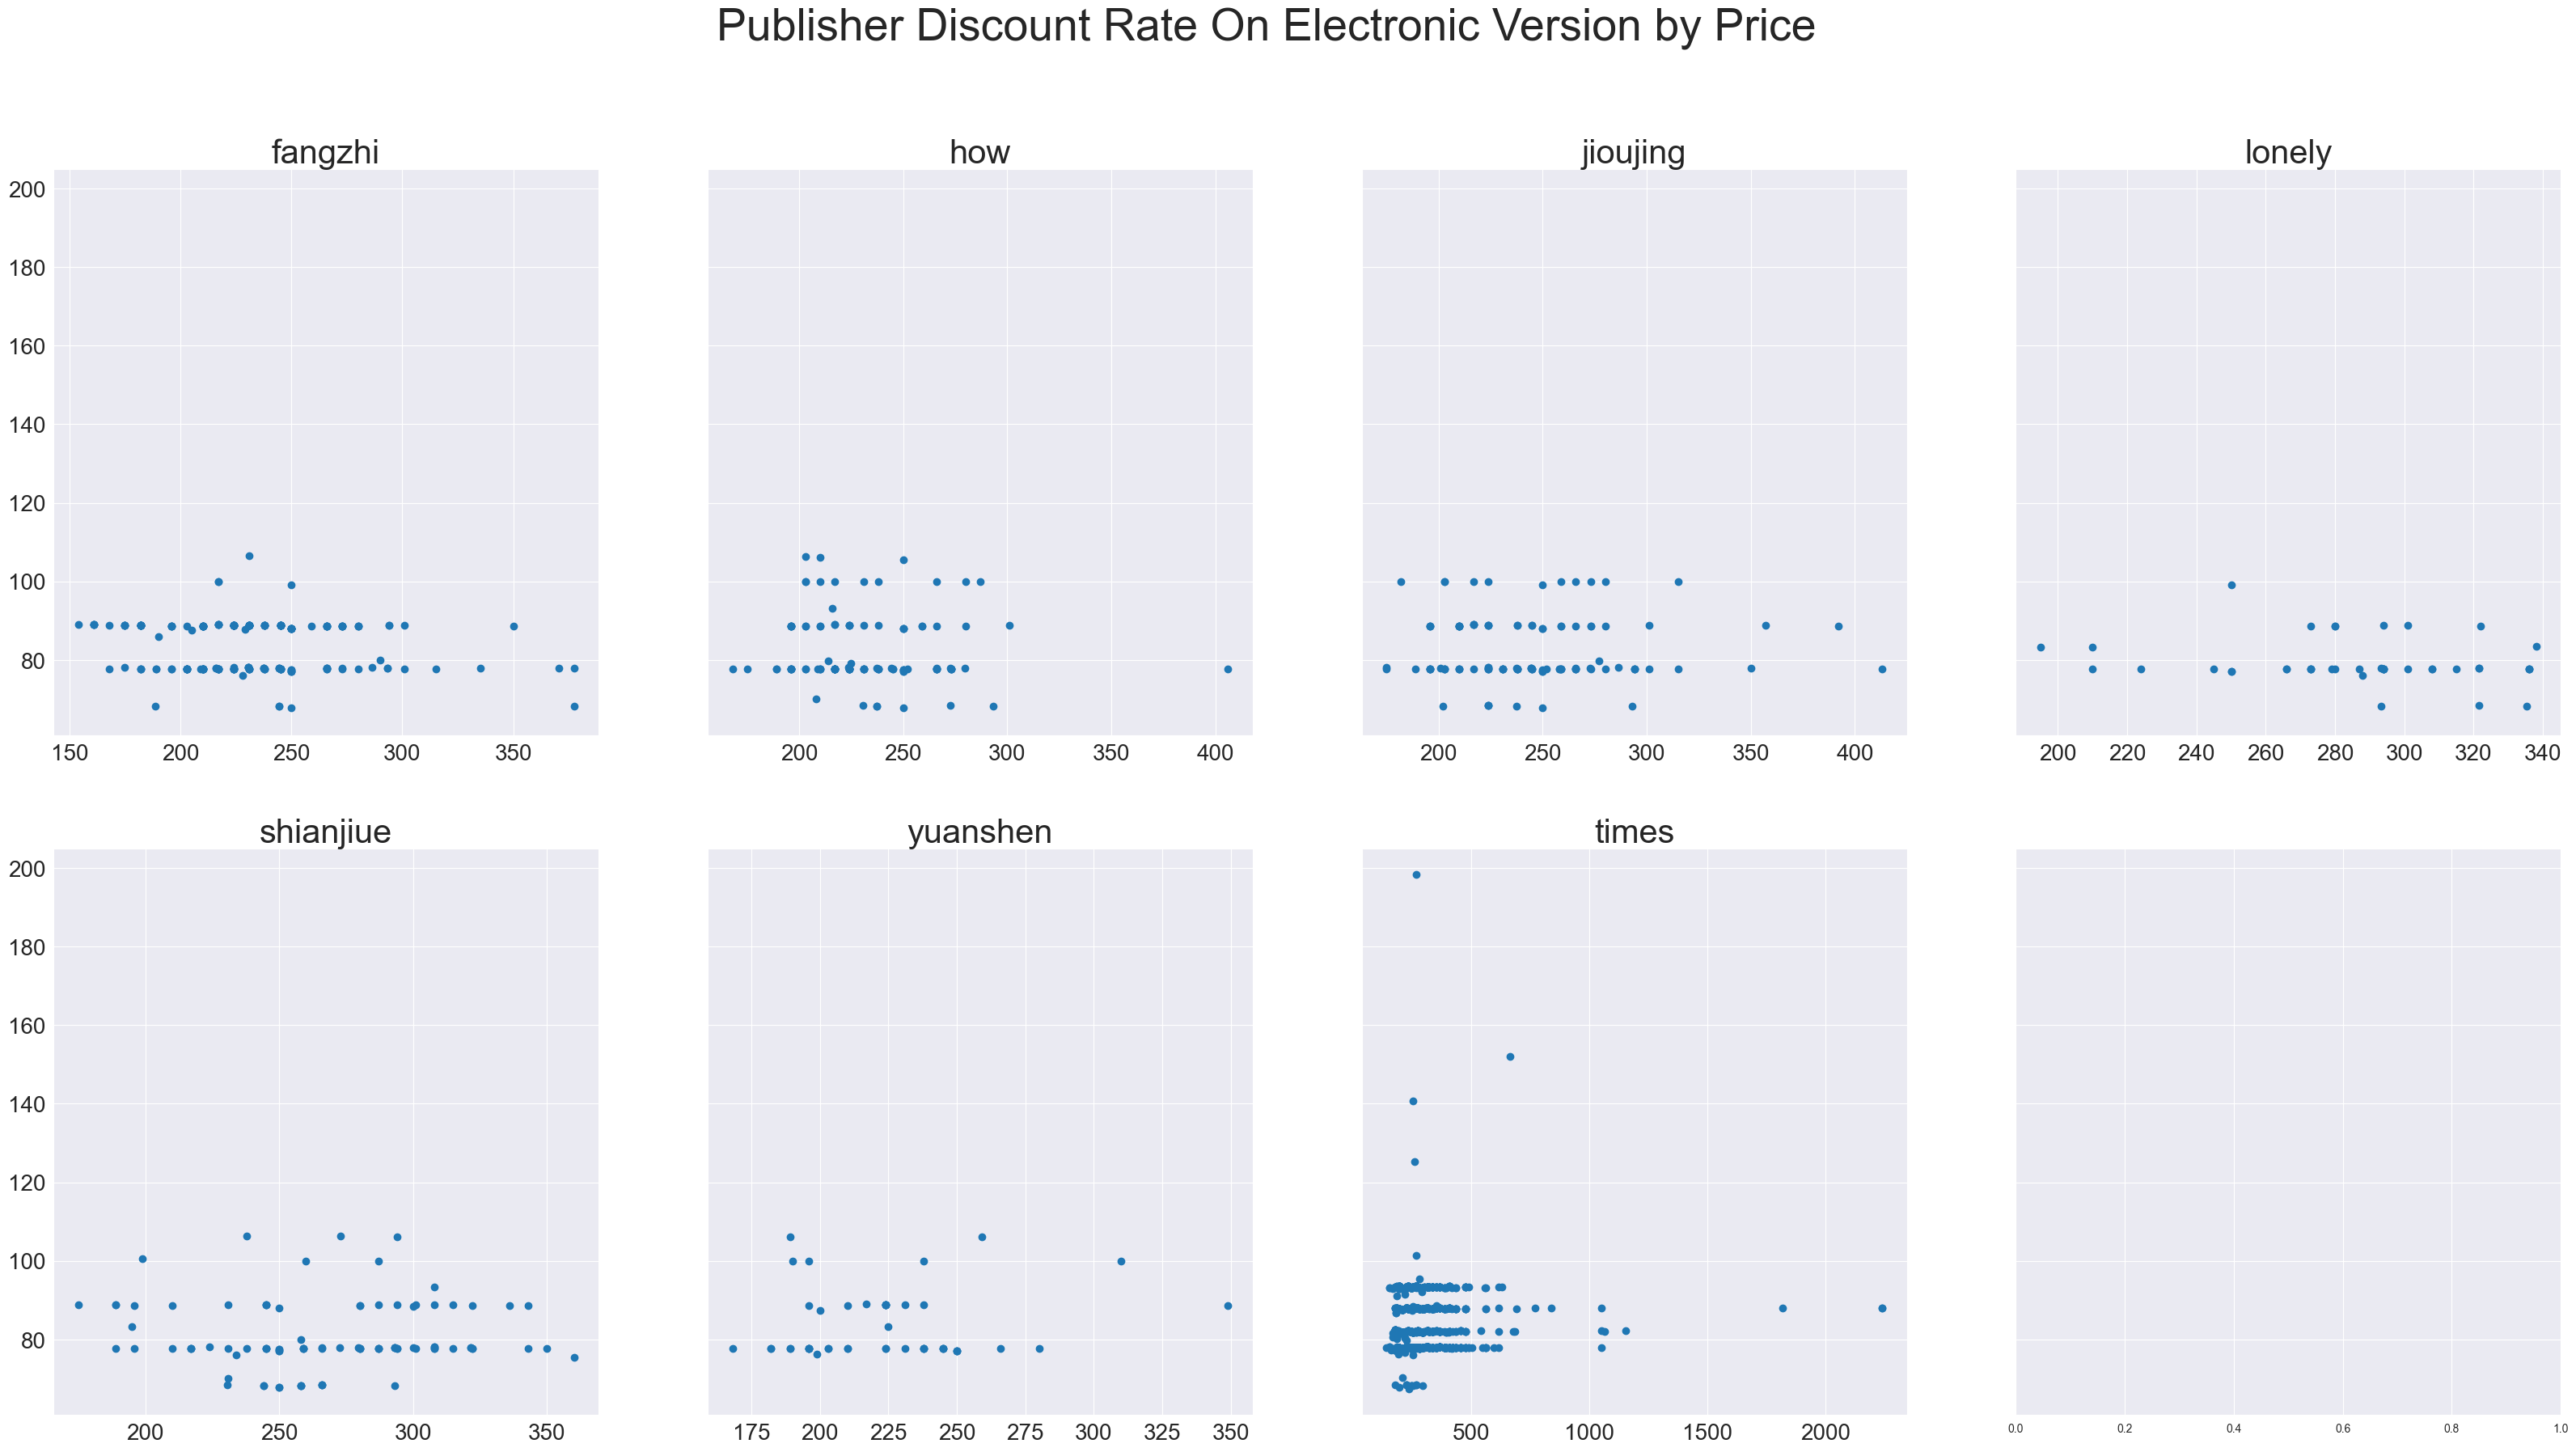

In [21]:
fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharey=True)
for i in range(7):
    scatter = axs[i//4, i%4].scatter(ebookdfs[i]['original_price'], ebookdfs[i]['discount_rate_of_ebook'])
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
fig.suptitle('Publisher Discount Rate On Electronic Version by Price', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount_rate_by_original_price.png")

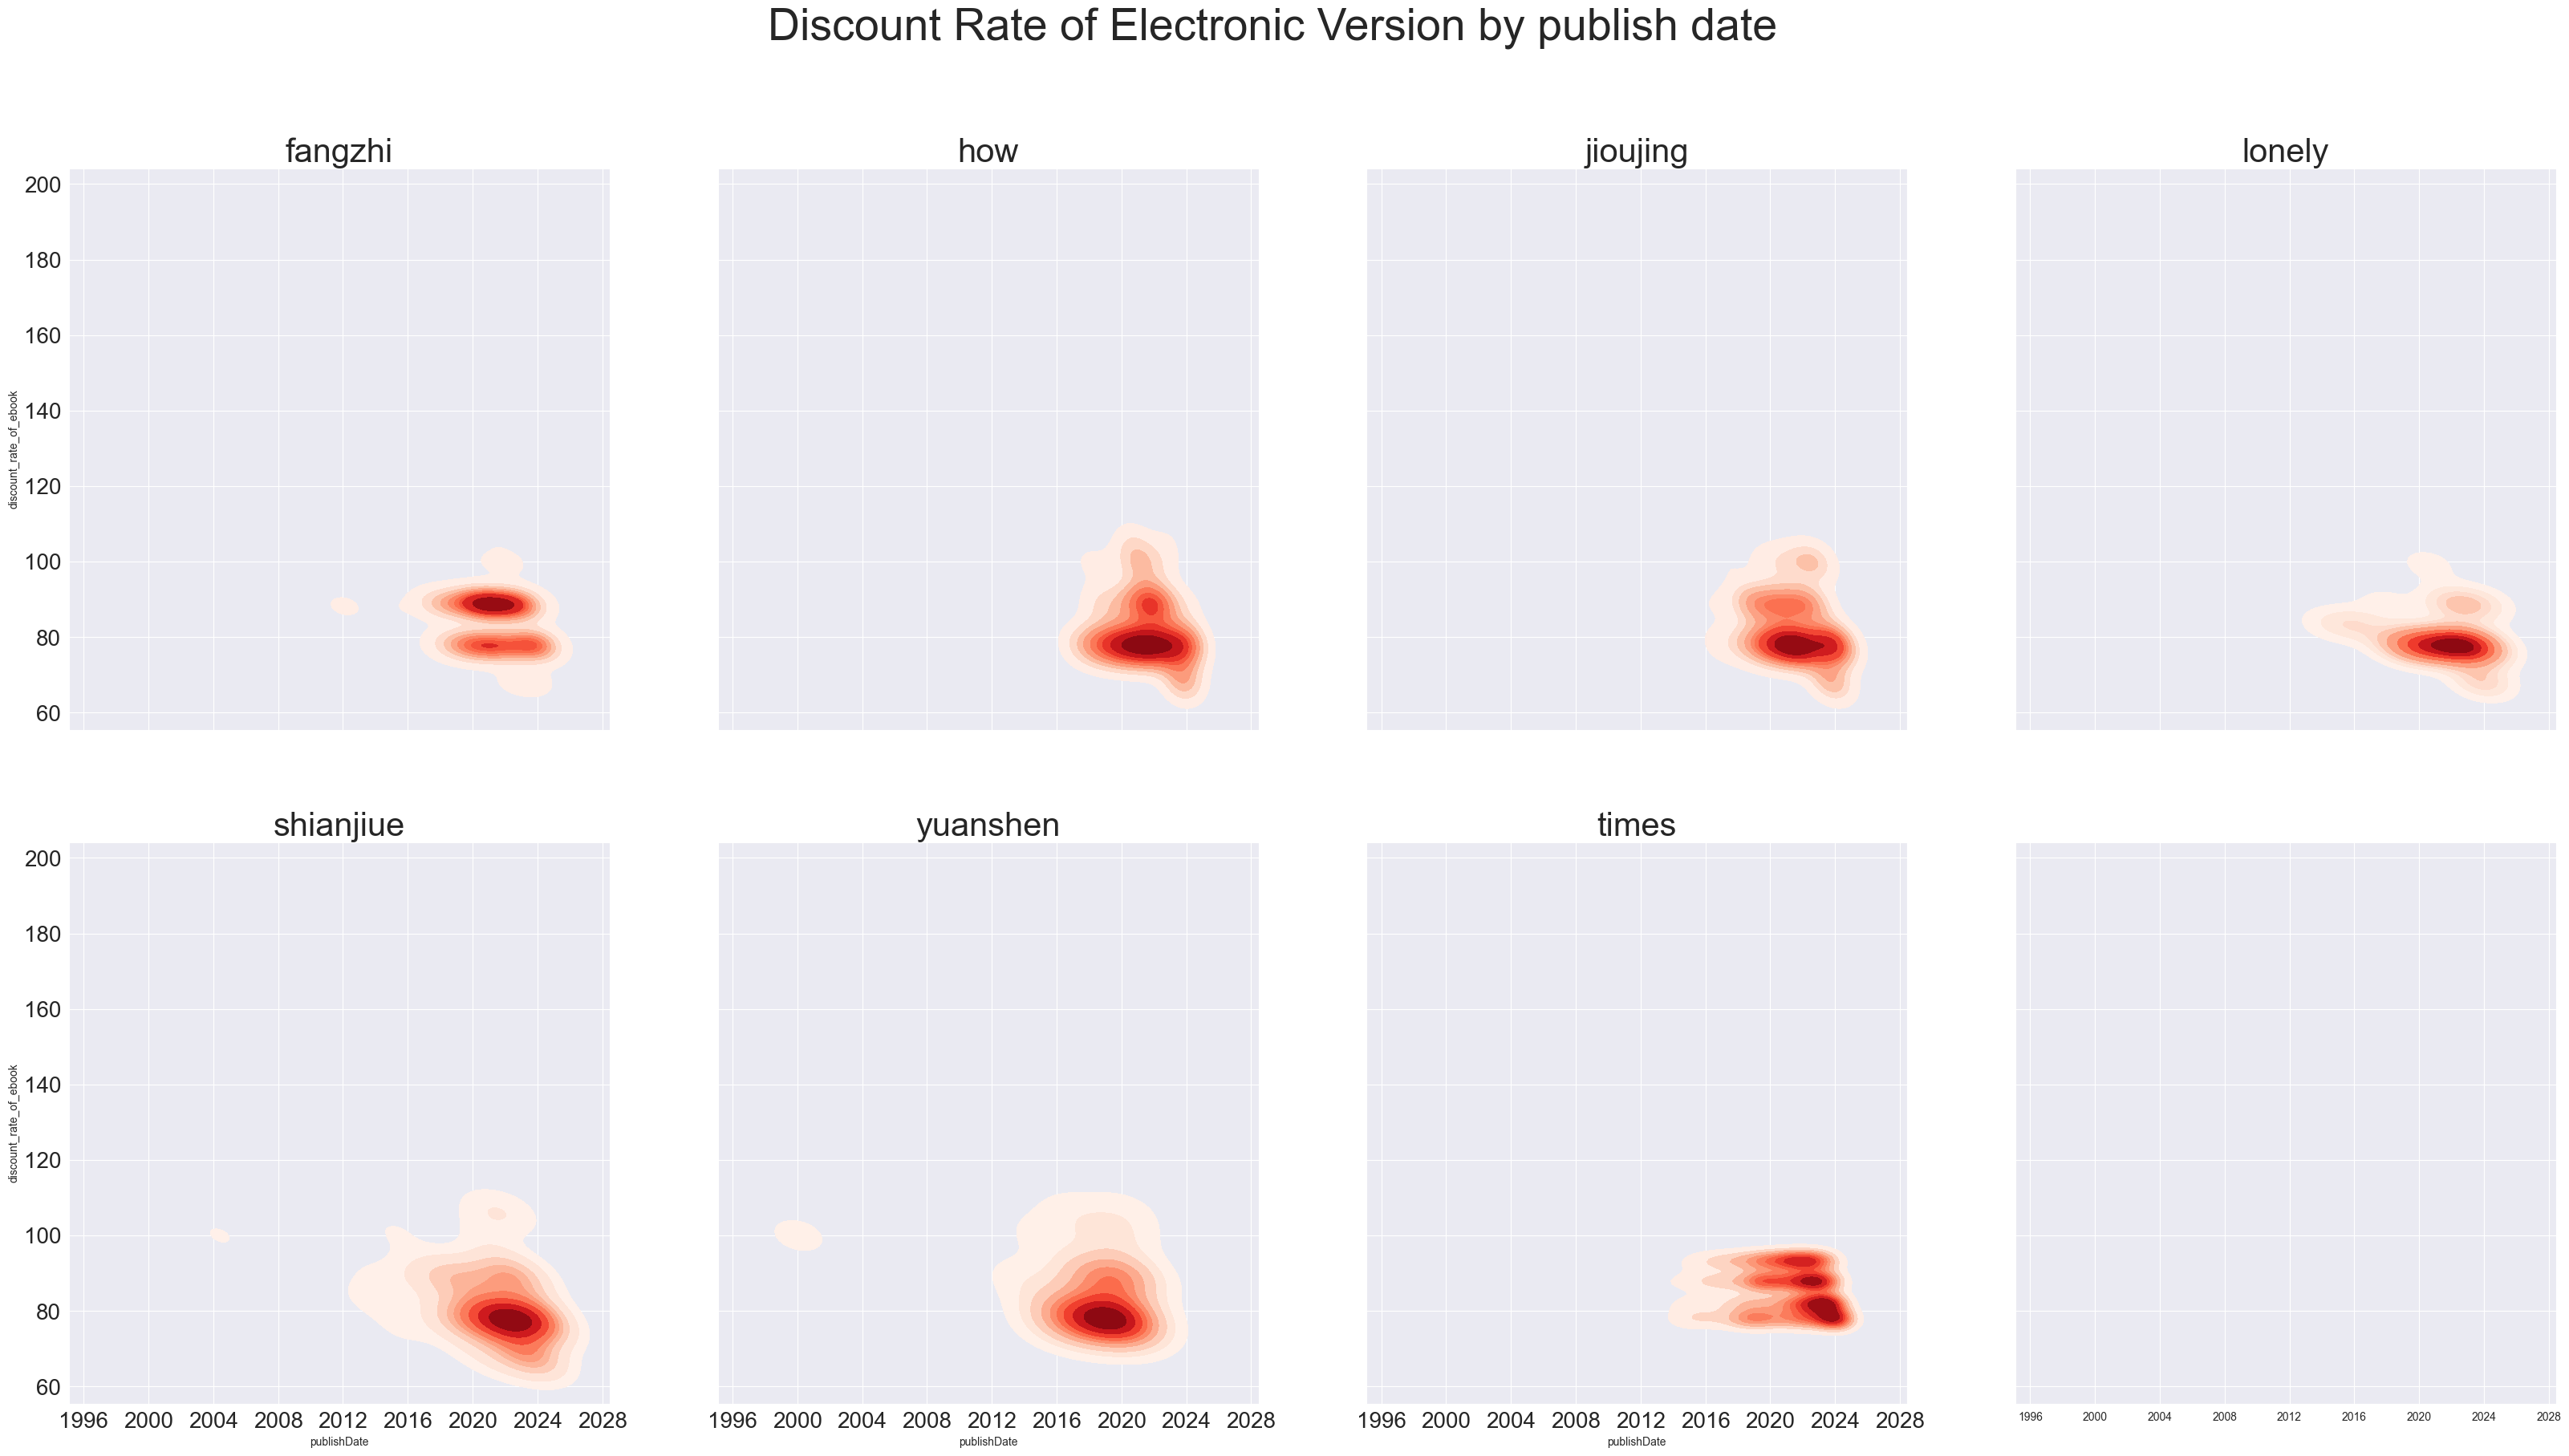

In [22]:
ig, axs = plt.subplots(2,4, figsize=(40, 20),sharey=True,sharex=True)
for i in range(7):
    sns.kdeplot(ebookdfs[i],x = 'publishDate',y="discount_rate_of_ebook", ax=axs[i//4, i%4],  cmap="Reds", fill=True)
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
ig.suptitle('Discount Rate of Electronic Version by publish date', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount_rate_kdeplot.png")

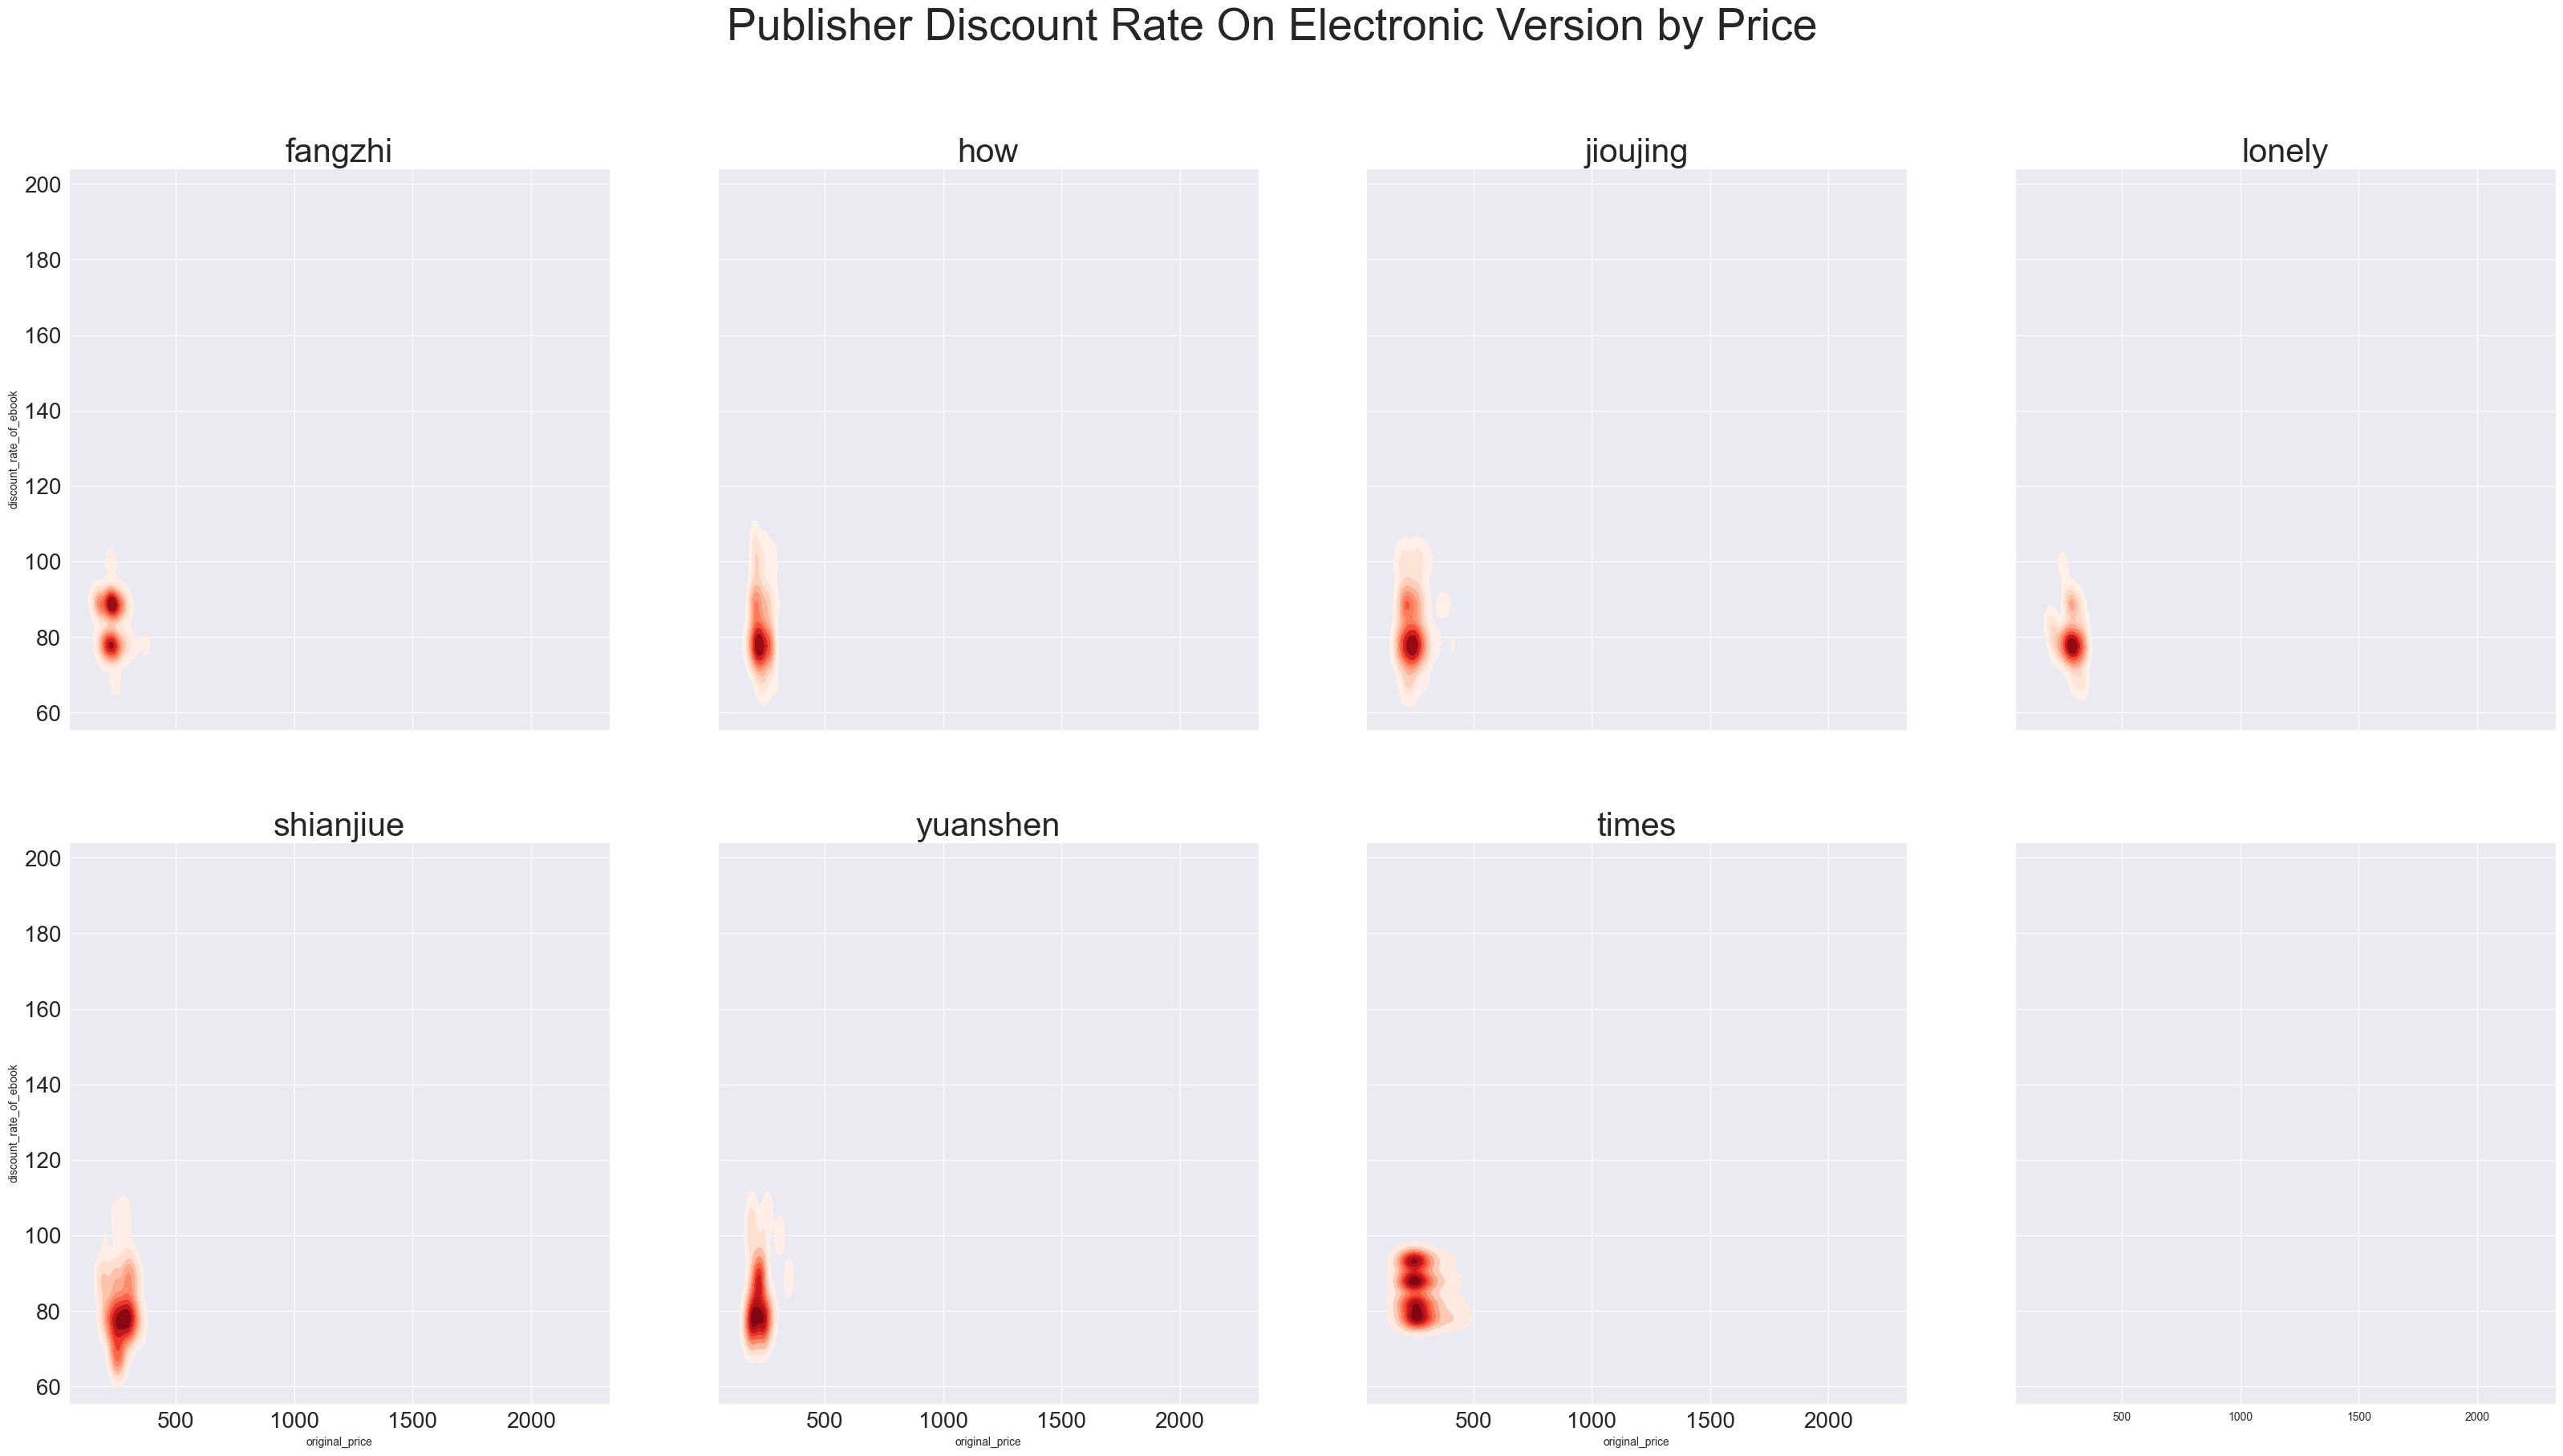

In [23]:
fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharey=True,sharex=True)
for i in range(7):
    sns.kdeplot(ebookdfs[i],x = 'original_price',y="discount_rate_of_ebook", ax=axs[i//4, i%4],  cmap="Reds", fill=True)
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
fig.suptitle('Publisher Discount Rate On Electronic Version by Price', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount_rate_by_original_price_kdeplot.png")

In [24]:
over = []
for i in range(7):
    over.append(ebookdfs[i][ebookdfs[i]['discount_rate_of_ebook']>=100])


In [25]:
ebookdfs[0]

,title,author,publisher,publication_date,discount,price,publishDate,original_price,electronic_version,paper_price,paper_original_price,paper_discount,discount_rate_of_ebook,discount_rate_of_ebook_in_origion
0,巨人的筆記【隨書附「摘要生活大小事」記錄別冊】：用記錄改寫人生的方法,金翼漢,方智,2024-05-01,100,228,2024-05-01,228.000000,True,300,379.746835,79.0,76.000000,60.040000
1,一切安好：結合醫學、肯定句與直覺力的身心靈完全療法,"蒙娜麗莎．舒茲,露易絲‧賀",方智,2024-05-01,100,290,2024-05-01,290.000000,True,363,459.493671,79.0,79.889807,63.112948
2,先別急著吃棉花糖【附棉花糖心法中英抄寫別冊】,"喬辛‧迪‧波沙達,愛倫‧辛格",方智,2024-04-01,88,190,2024-04-01,215.909091,True,244,308.860759,79.0,77.868852,69.904993
3,當整理卡關時：獨居、同住都能實踐的零雜物生活,Phyllis,方智,2024-04-01,100,301,2024-04-01,301.000000,True,339,429.113924,79.0,88.790560,70.144543
4,讓奇蹟發生的技術：每個感謝，都會回到你身上,武田雙雲,方智,2024-04-01,88,209,2024-04-01,237.500000,True,268,339.240506,79.0,77.985075,70.009328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,怦然心動的人生整理魔法2：實踐篇‧解惑篇,近藤麻理惠,方智,2013-04-25,100,175,2013-04-25,175.000000,True,None,NaN,NaN,NaN,NaN
215,NLP之父3天改變你的一生,理查．班德勒、艾里西歐．羅伯堤、歐文．菲茲帕特里克,方智,2013-01-24,100,168,2013-01-24,168.000000,True,216,240.000000,90.0,77.777778,70.000000
216,零雜物：讓生活輕盈，讓心更自由,Phyllis,方智,2012-05-24,100,205,2012-05-24,205.000000,True,234,260.000000,90.0,87.606838,78.846154
217,怦然心動的人生整理魔法,近藤麻理惠,方智,2011-10-25,100,175,2011-10-25,175.000000,True,197,249.367089,79.0,88.832487,70.177665


In [26]:
for i in over:
    i = i.reset_index(drop=True)
    print(i,end="\n\n")

                         title             author publisher publication_date  \
0                     躁鬱人的機智生活               坂口恭平        方智       2022-05-01   
1  沒人看見你的好，你要懂得自己誇：掌握勇敢自我推銷的藝術            梅樂迪斯．芬曼        方智       2021-06-01   
2          思考致富.最新實證版：史上最暢銷勵志書  拿破崙‧希爾基金會,詹姆士‧惠特克        方智       2020-11-01   

   discount price publishDate  original_price  electronic_version paper_price  \
0       100   217  2022-05-01           217.0                True         217   
1       100   231  2021-06-01           231.0                True         217   
2       100   217  2020-11-01           217.0                True         217   

   paper_original_price  paper_discount  discount_rate_of_ebook  \
0            310.000000            70.0              100.000000   
1            328.787879            66.0              106.451613   
2            310.000000            70.0              100.000000   

   discount_rate_of_ebook_in_origion  
0                          70.000000  
1      

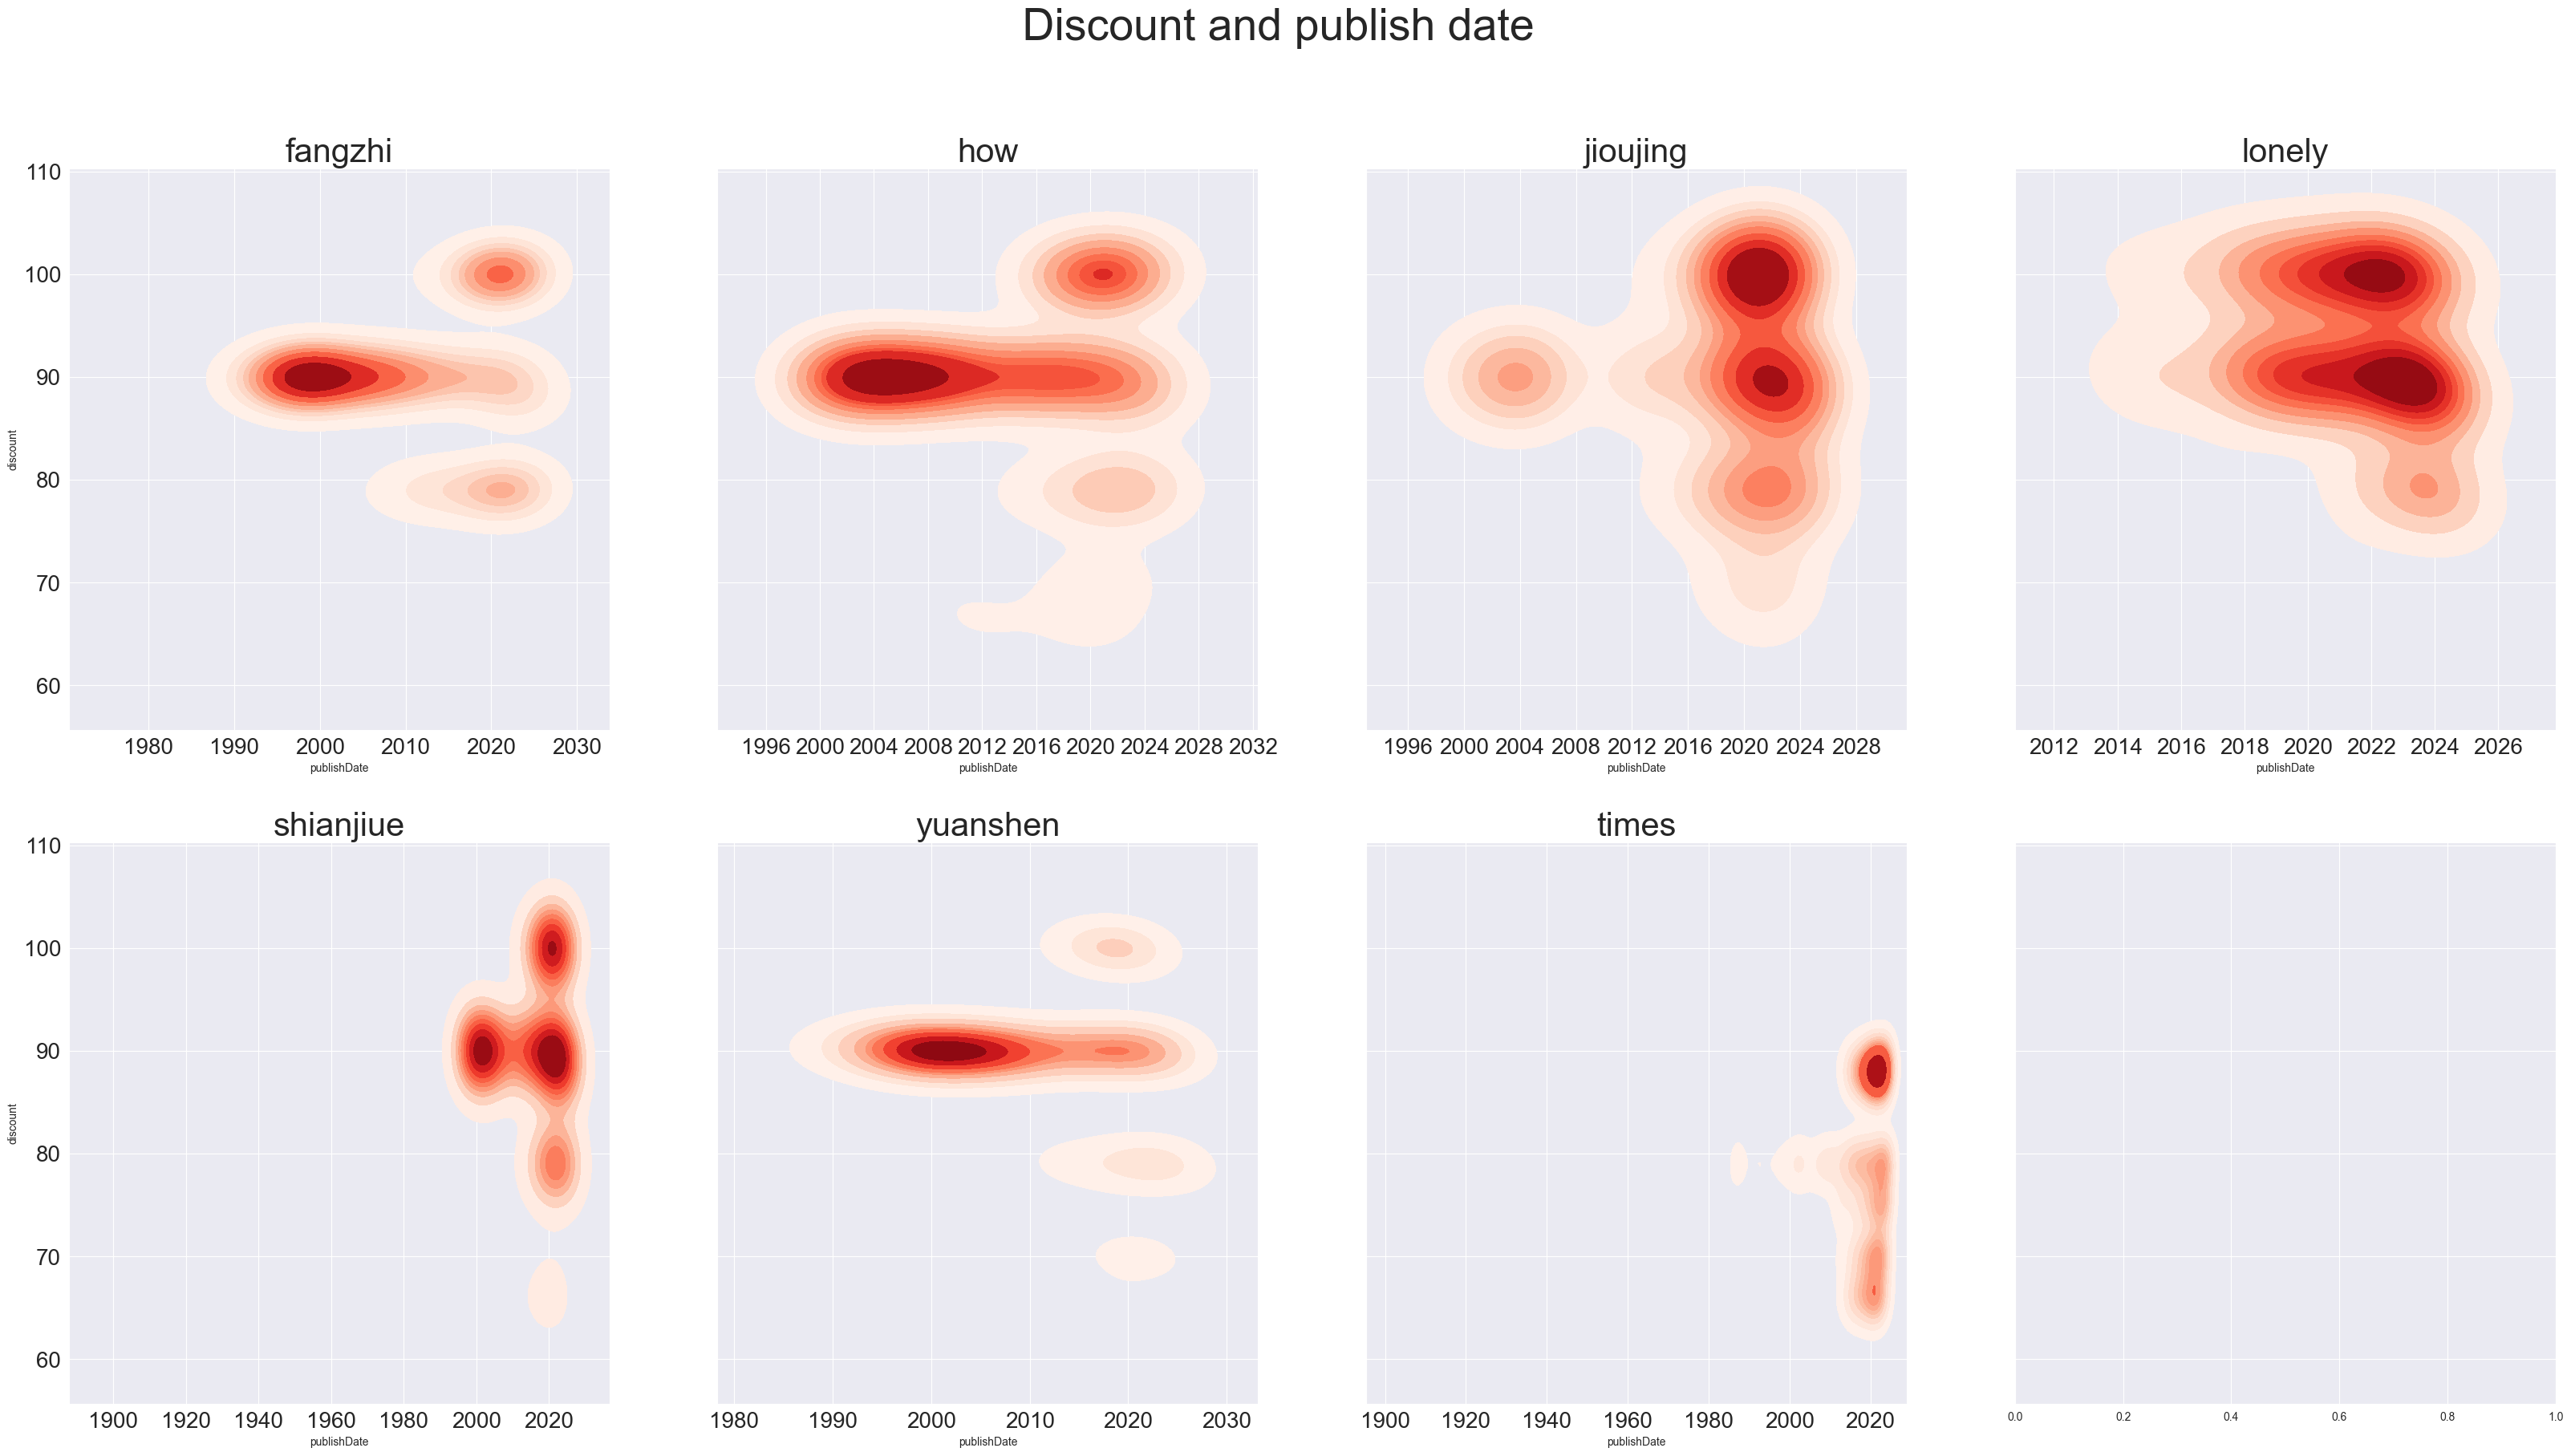

In [27]:
fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharey=True)
for i in range(7):
    sns.kdeplot(dfs[i],x = 'publishDate',y="discount", ax=axs[i//4, i%4],  cmap="Reds", fill=True)
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes

# Add a colorbar to the figure
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label('Electronic Version', rotation=270, labelpad=20, fontsize=20)
cbar.ax.tick_params(labelsize=20)  # Change the size of the colorbar tick labels
cbar.set_ticklabels(['is_paper', 'is_ebook'])  # Set the tick labels to 'is_paper' and 'is_ebook'
plt.suptitle(' Discount and publish date', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount_kdeplot.png")

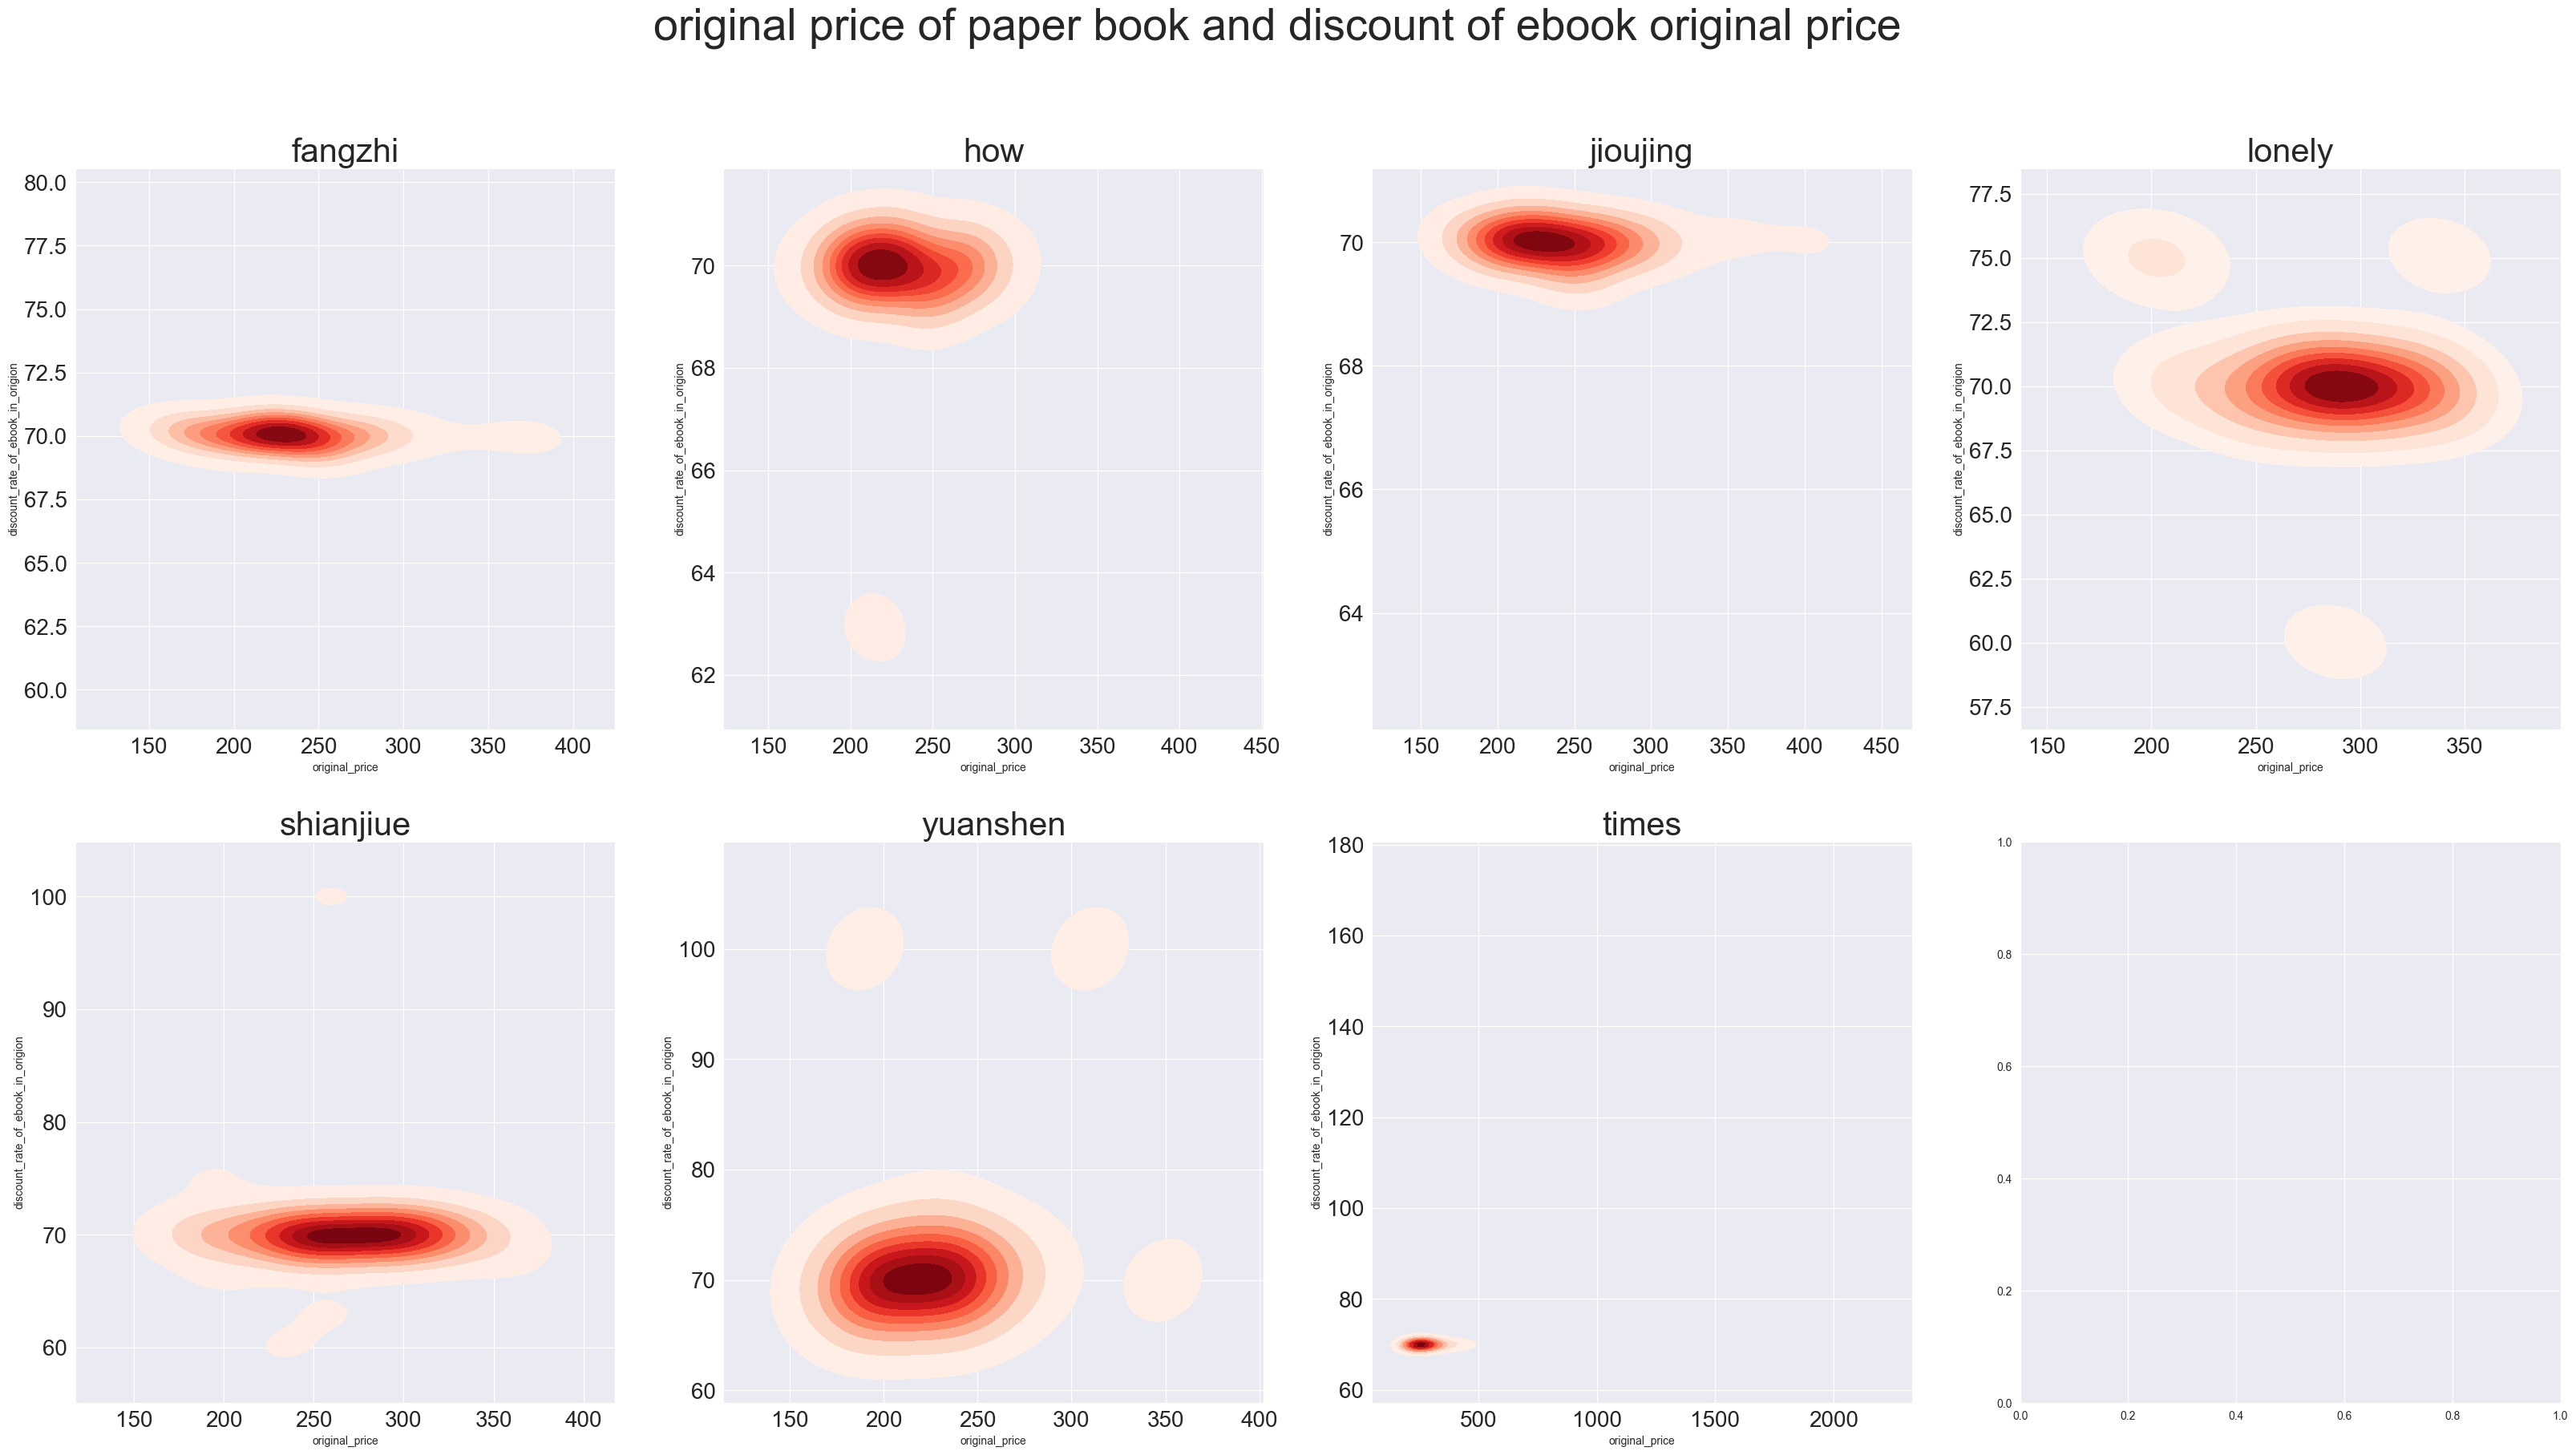

In [28]:
fig, axs = plt.subplots(2, 4, figsize=(40, 20))
for i in range(7):
    sns.kdeplot(ebookdfs[i],x = 'original_price',y="discount_rate_of_ebook_in_origion", ax=axs[i//4, i%4],  cmap="Reds", fill=True)
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
fig.suptitle('original price of paper book and discount of ebook original price', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_kdeplot.png")

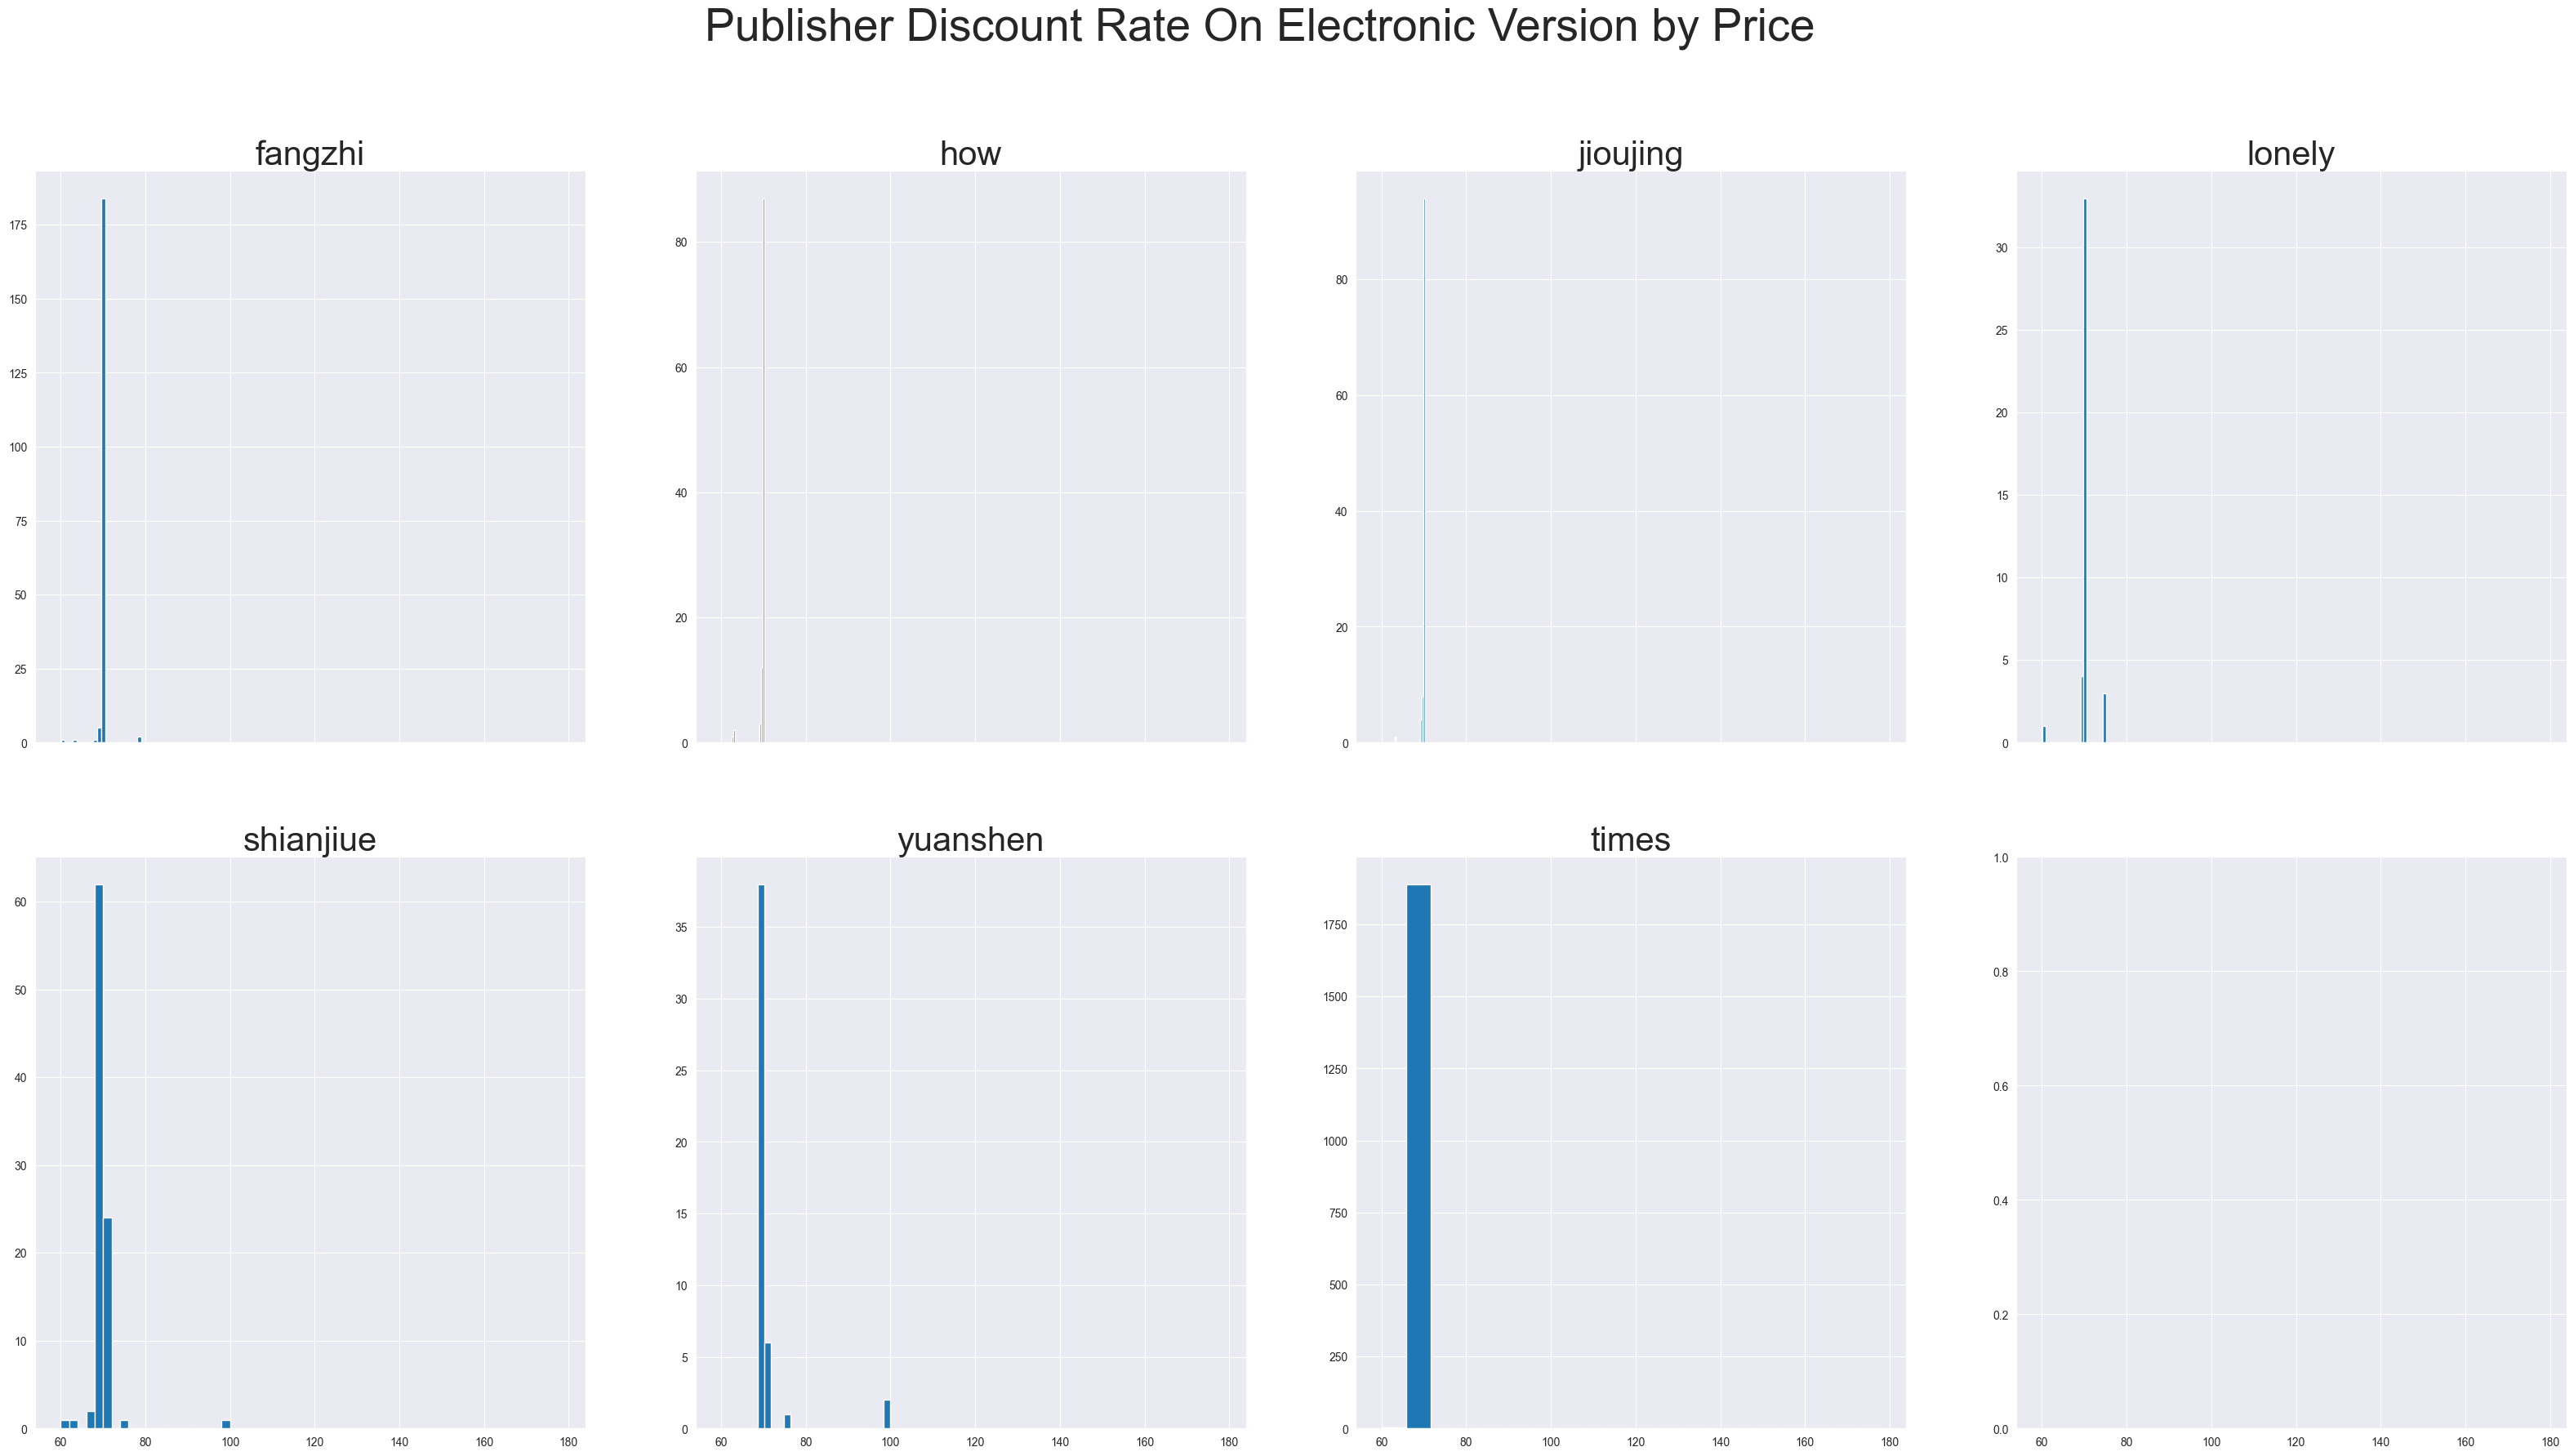

In [29]:
fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharex=True)
for i in range(7):
    axs[i//4, i%4].hist(ebookdfs[i]['discount_rate_of_ebook_in_origion'],bins=20)
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
fig.suptitle('Publisher Discount Rate On Electronic Version by Price', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_hist.png")

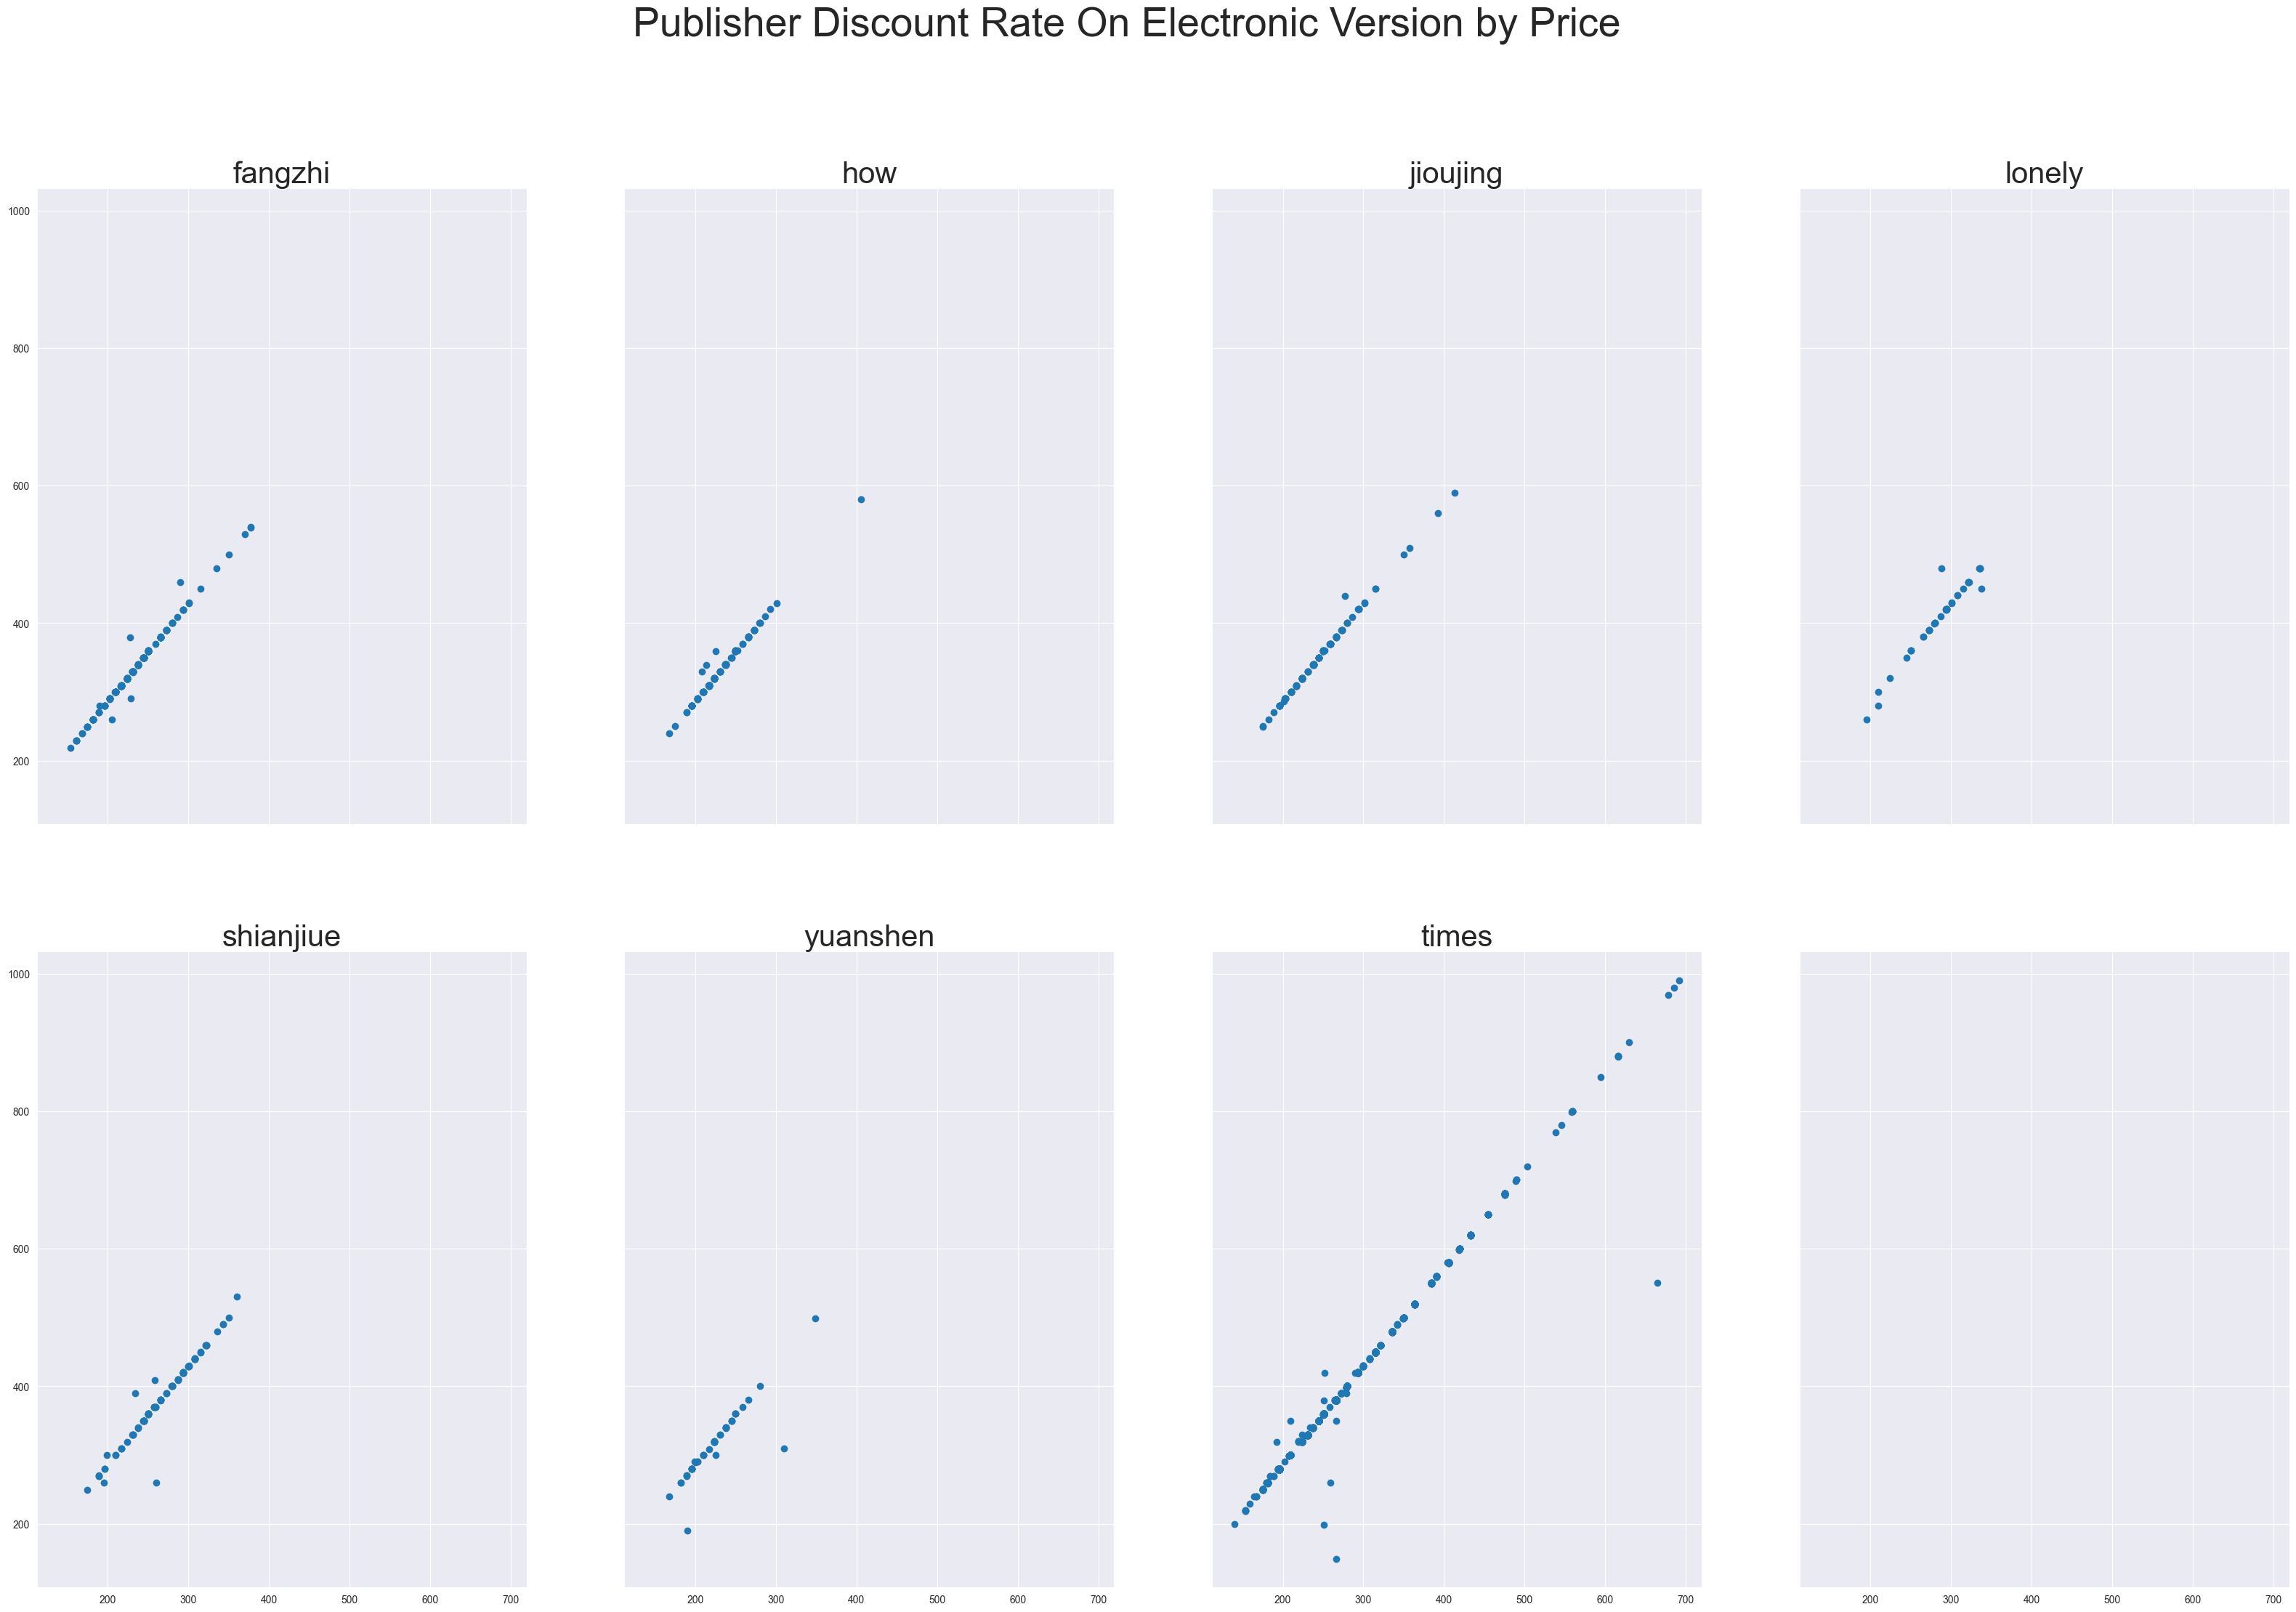

In [30]:
fig, axs = plt.subplots(2, 4, figsize=(40, 25),sharex=True,sharey= True)
for i in range(7):
    axs[i//4, i%4].scatter(ebookdfs[i][ebookdfs[i]['original_price']<700]['original_price'],ebookdfs[i][ebookdfs[i]['original_price']<700]['paper_original_price'])
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
fig.suptitle('Publisher Discount Rate On Electronic Version by Price', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_scatter.png")

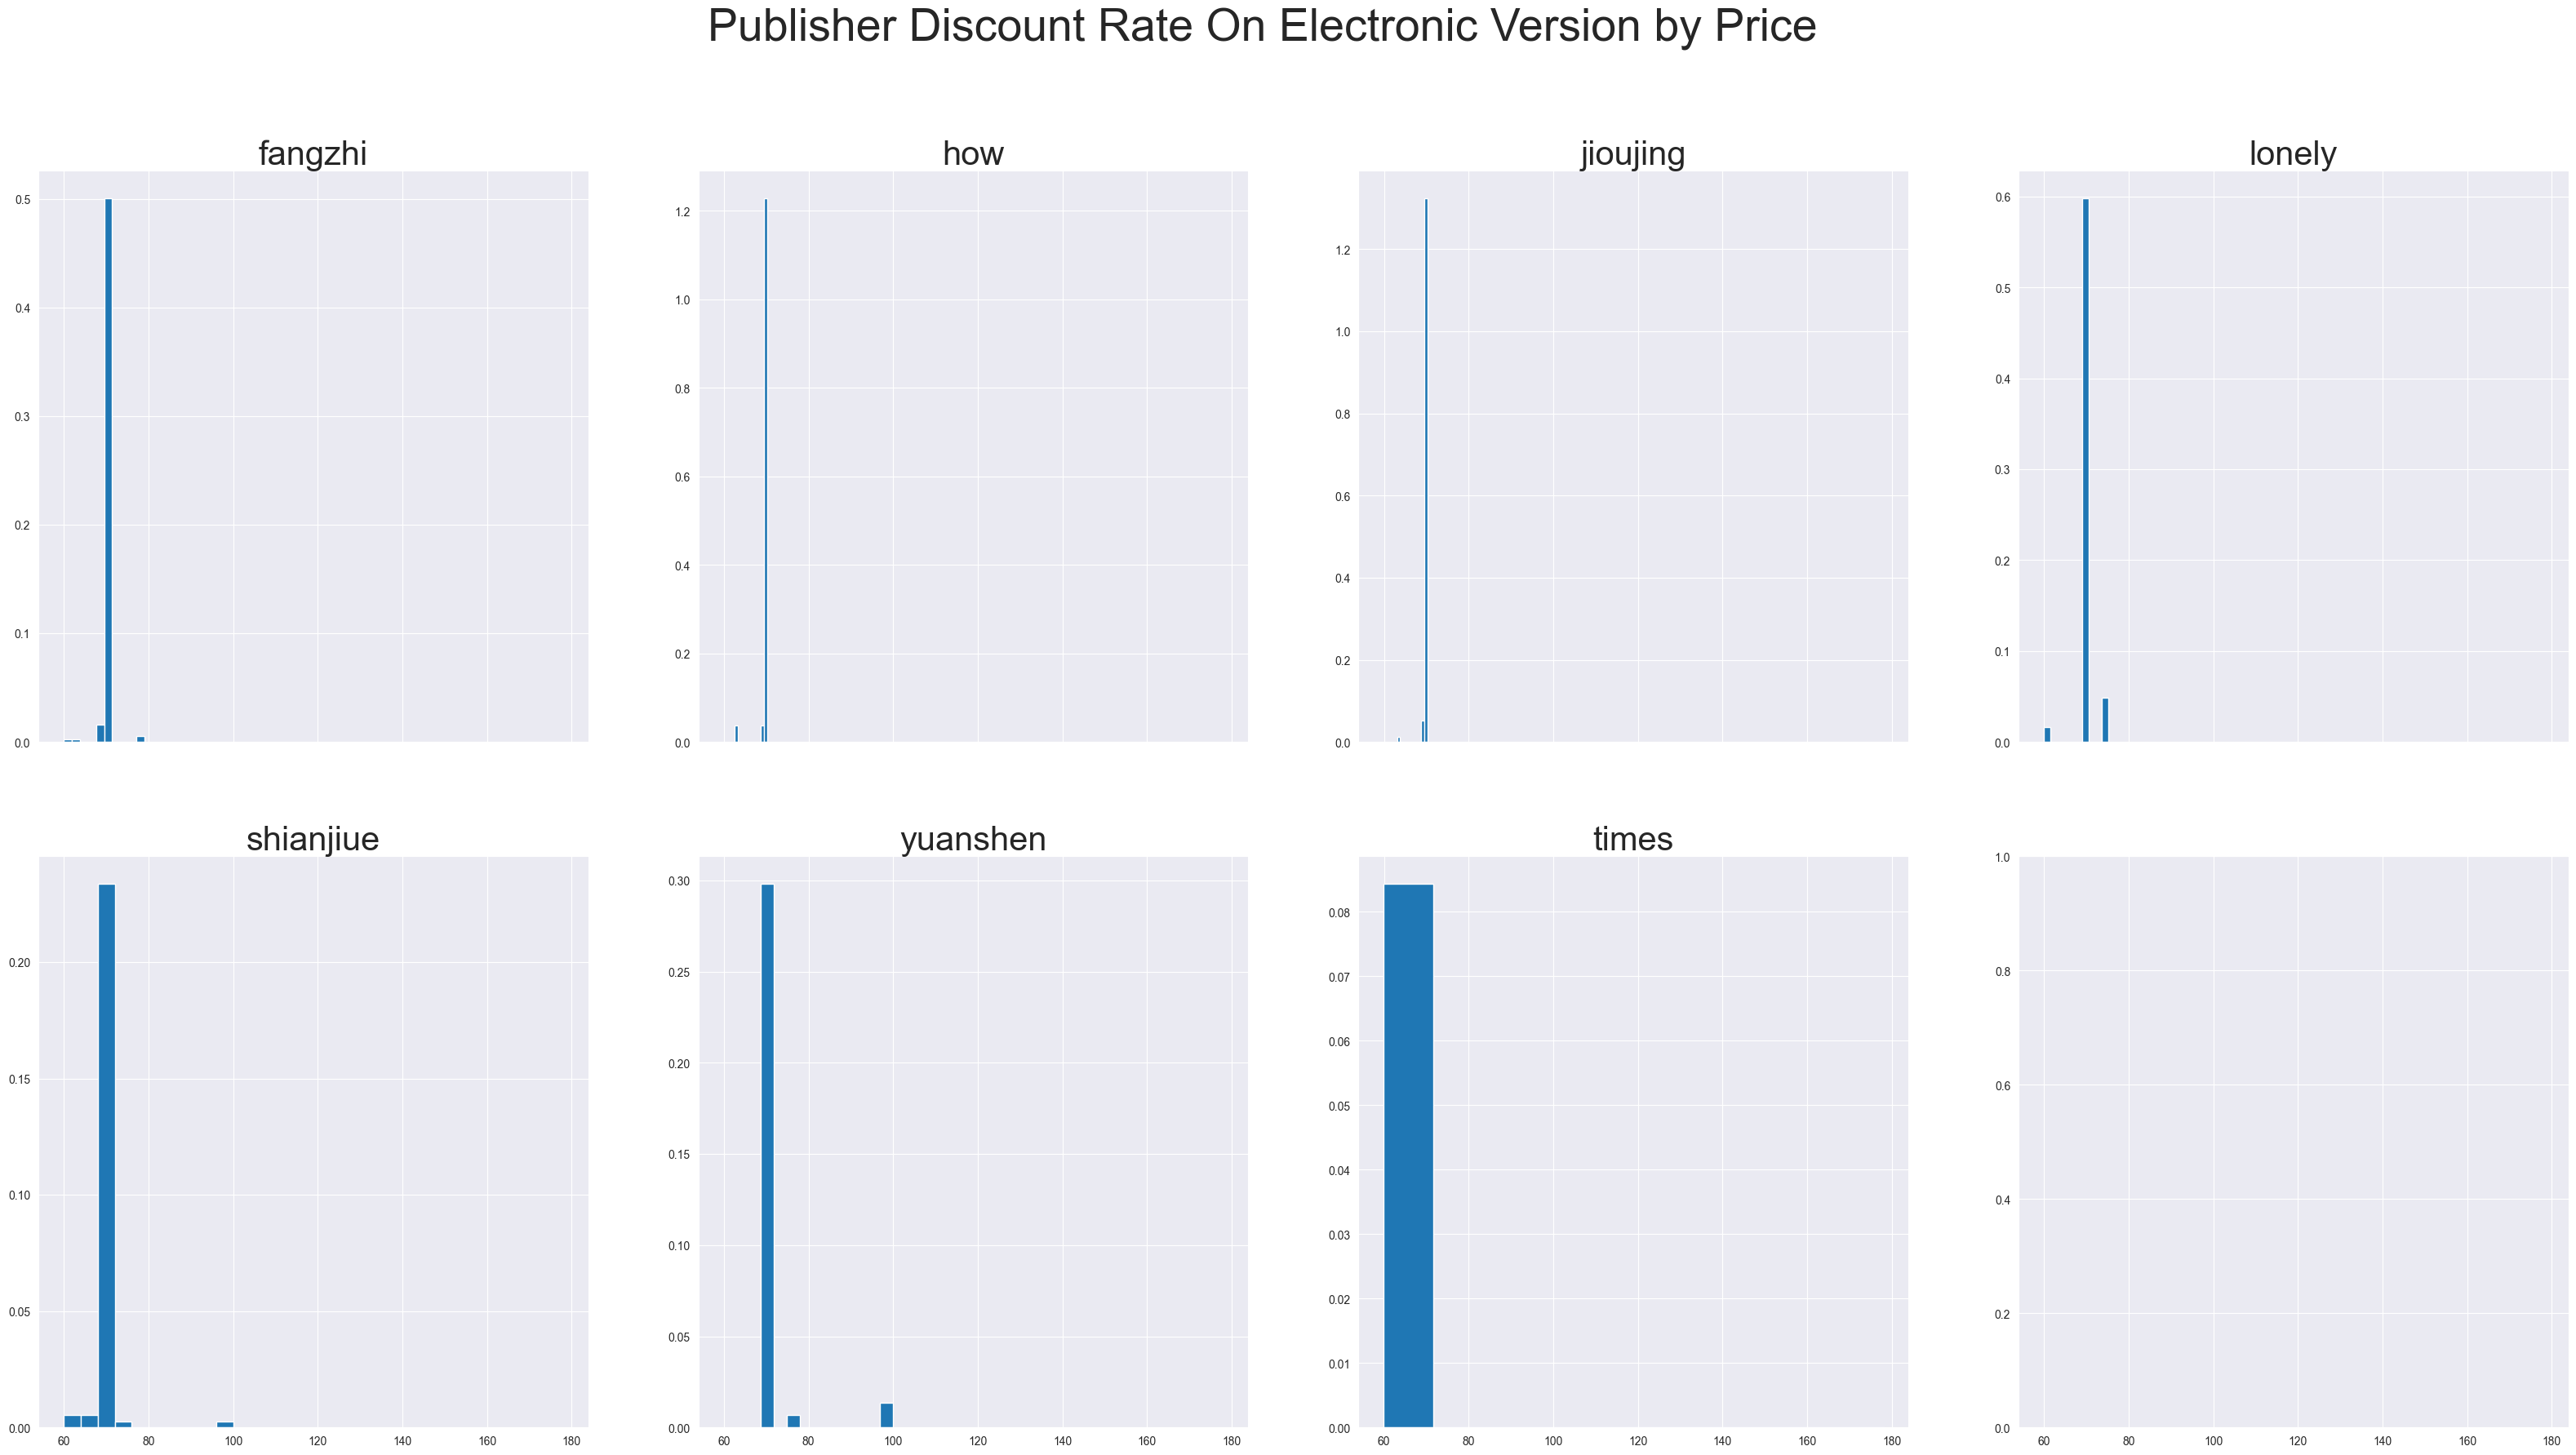

In [31]:
fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharex=True)
for i in range(7):
    axs[i//4, i%4].hist(ebookdfs[i]['discount_rate_of_ebook_in_origion'], density=True)
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
fig.suptitle('Publisher Discount Rate On Electronic Version by Price', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_hist.png")

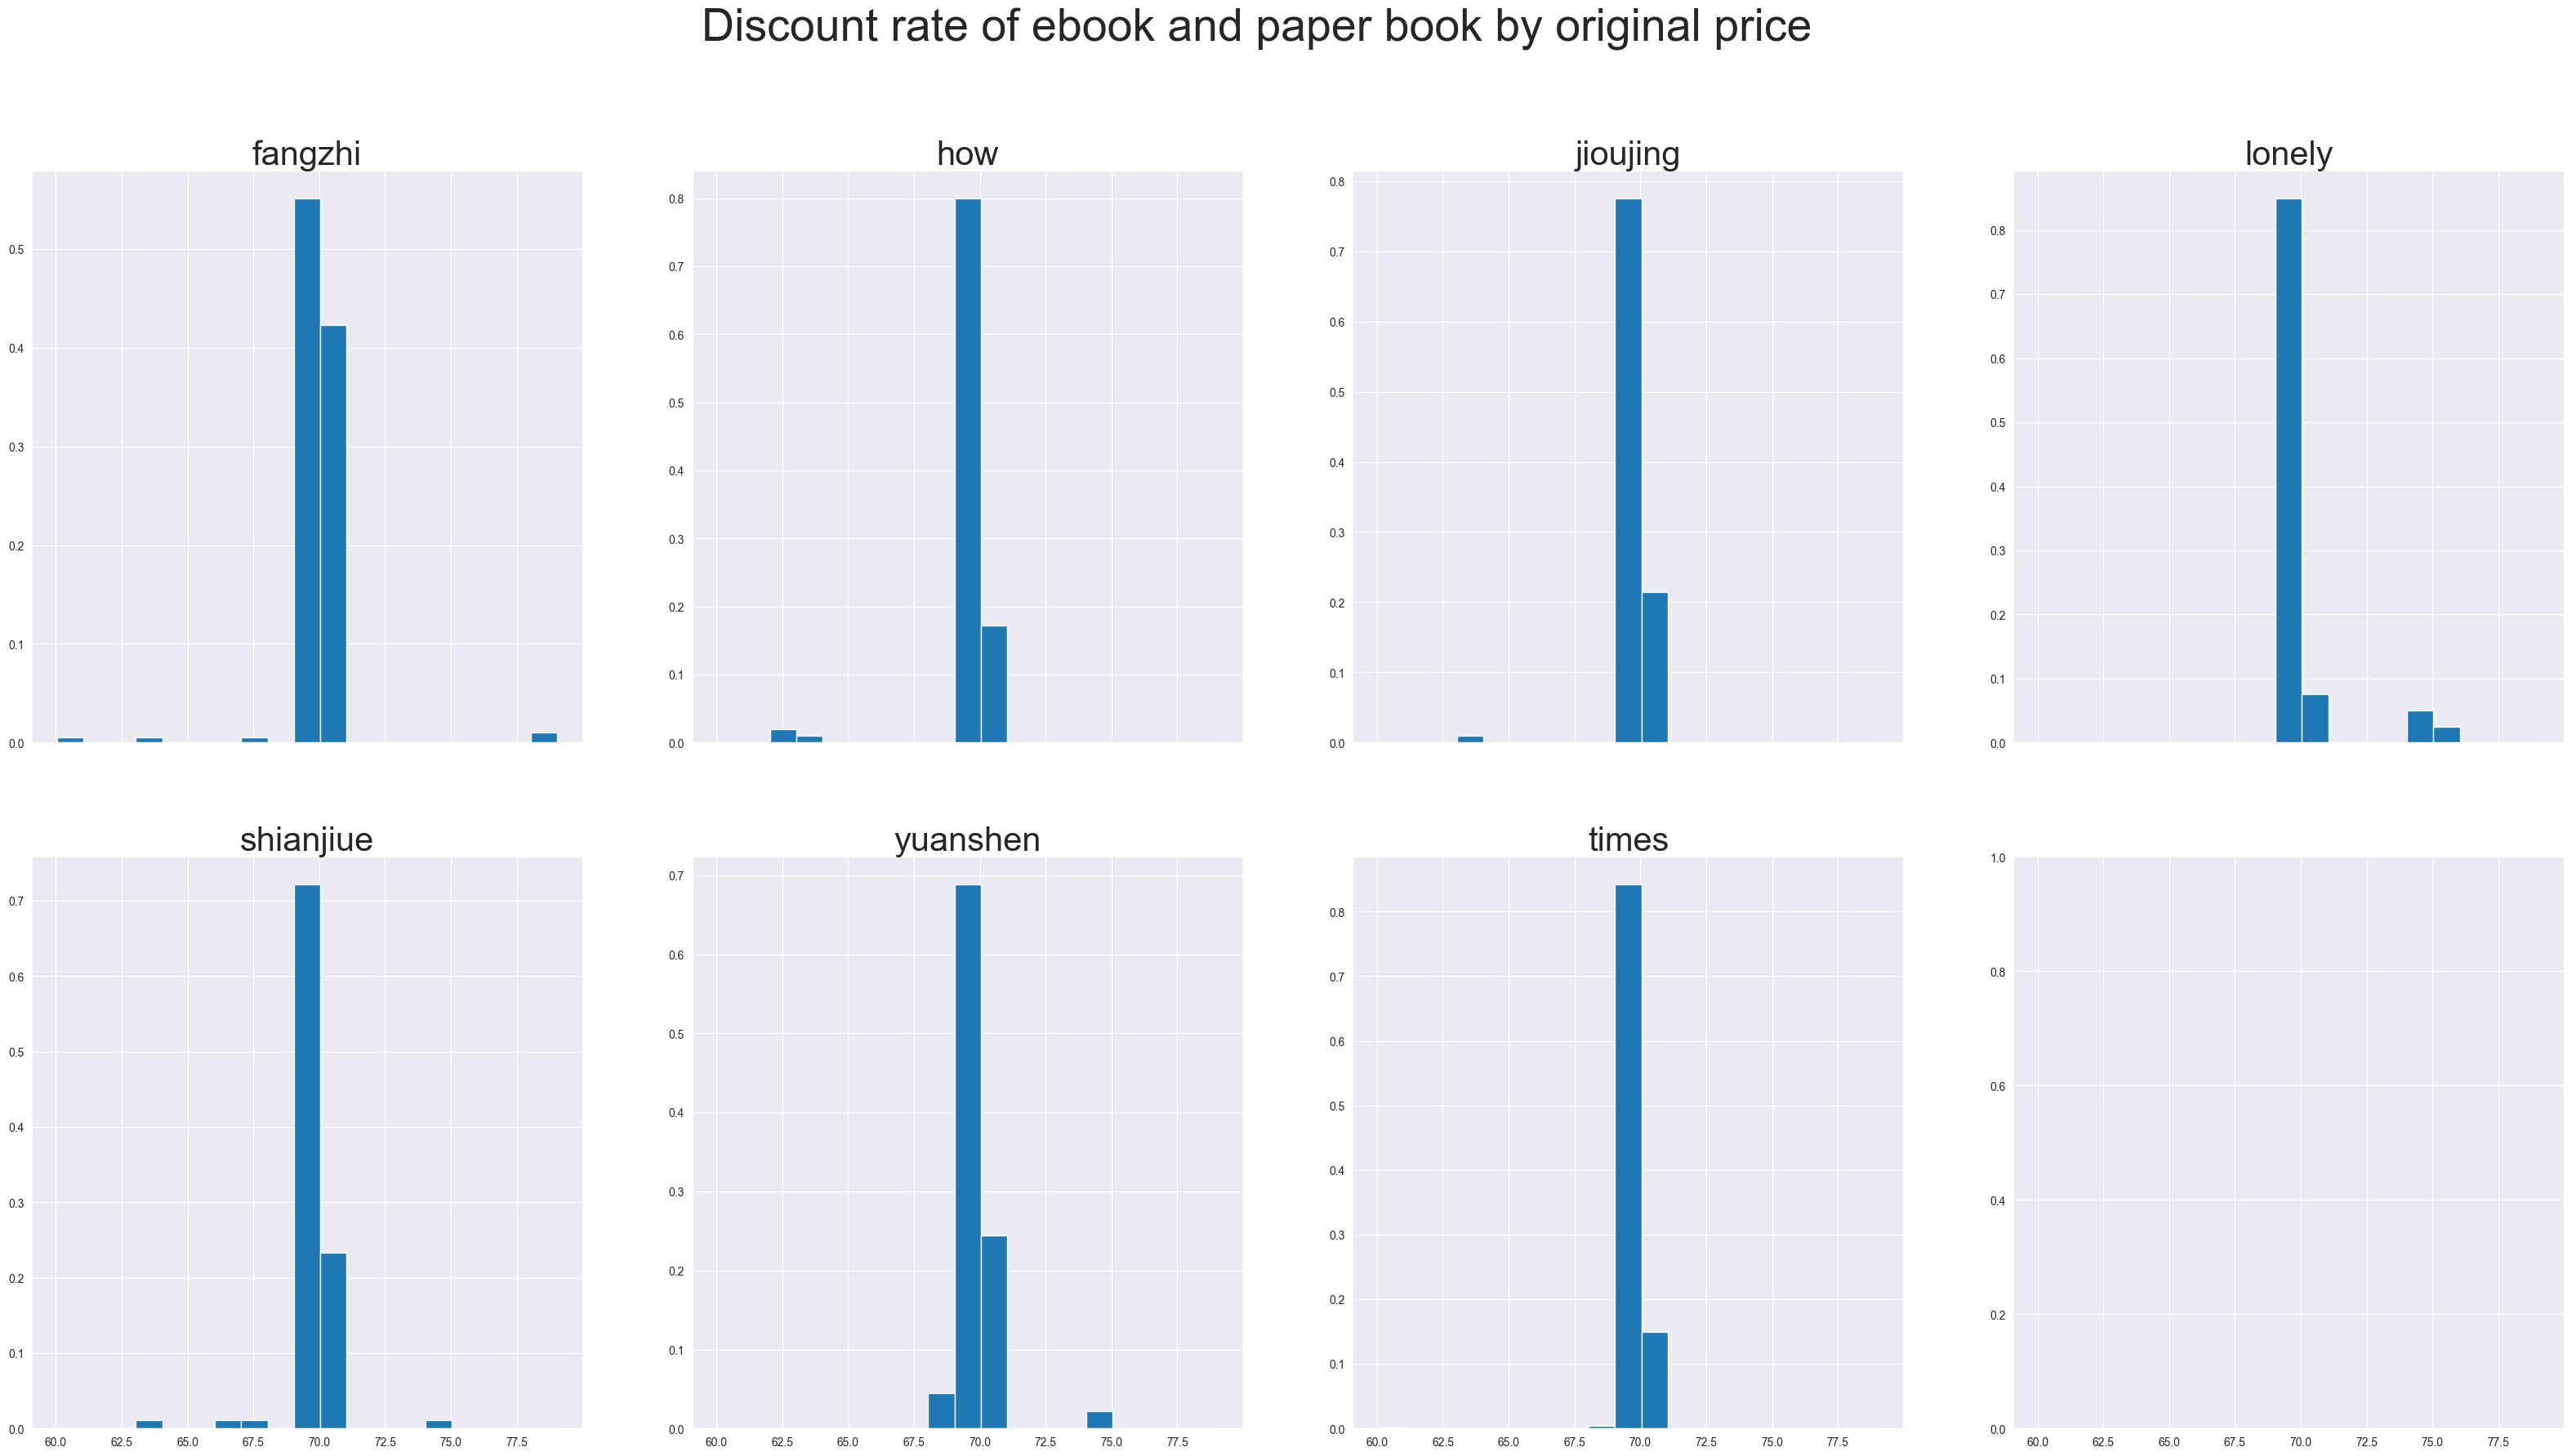

In [32]:
fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharex=True)
bin_width = 1  # You can adjust this value to change the bin width
bin_edges = np.arange(start=ebookdfs[0]['discount_rate_of_ebook_in_origion'].min(),
                      stop=ebookdfs[0]['discount_rate_of_ebook_in_origion'].max() + bin_width,
                      step=bin_width)

for i in range(7):
    axs[i//4, i%4].hist(ebookdfs[i]['discount_rate_of_ebook_in_origion'], bins=bin_edges, density=True)
    axs[i//4, i%4].set_title(labels[i], fontsize=30)

fig.suptitle('Discount rate of ebook and paper book by original price', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_hist.png")

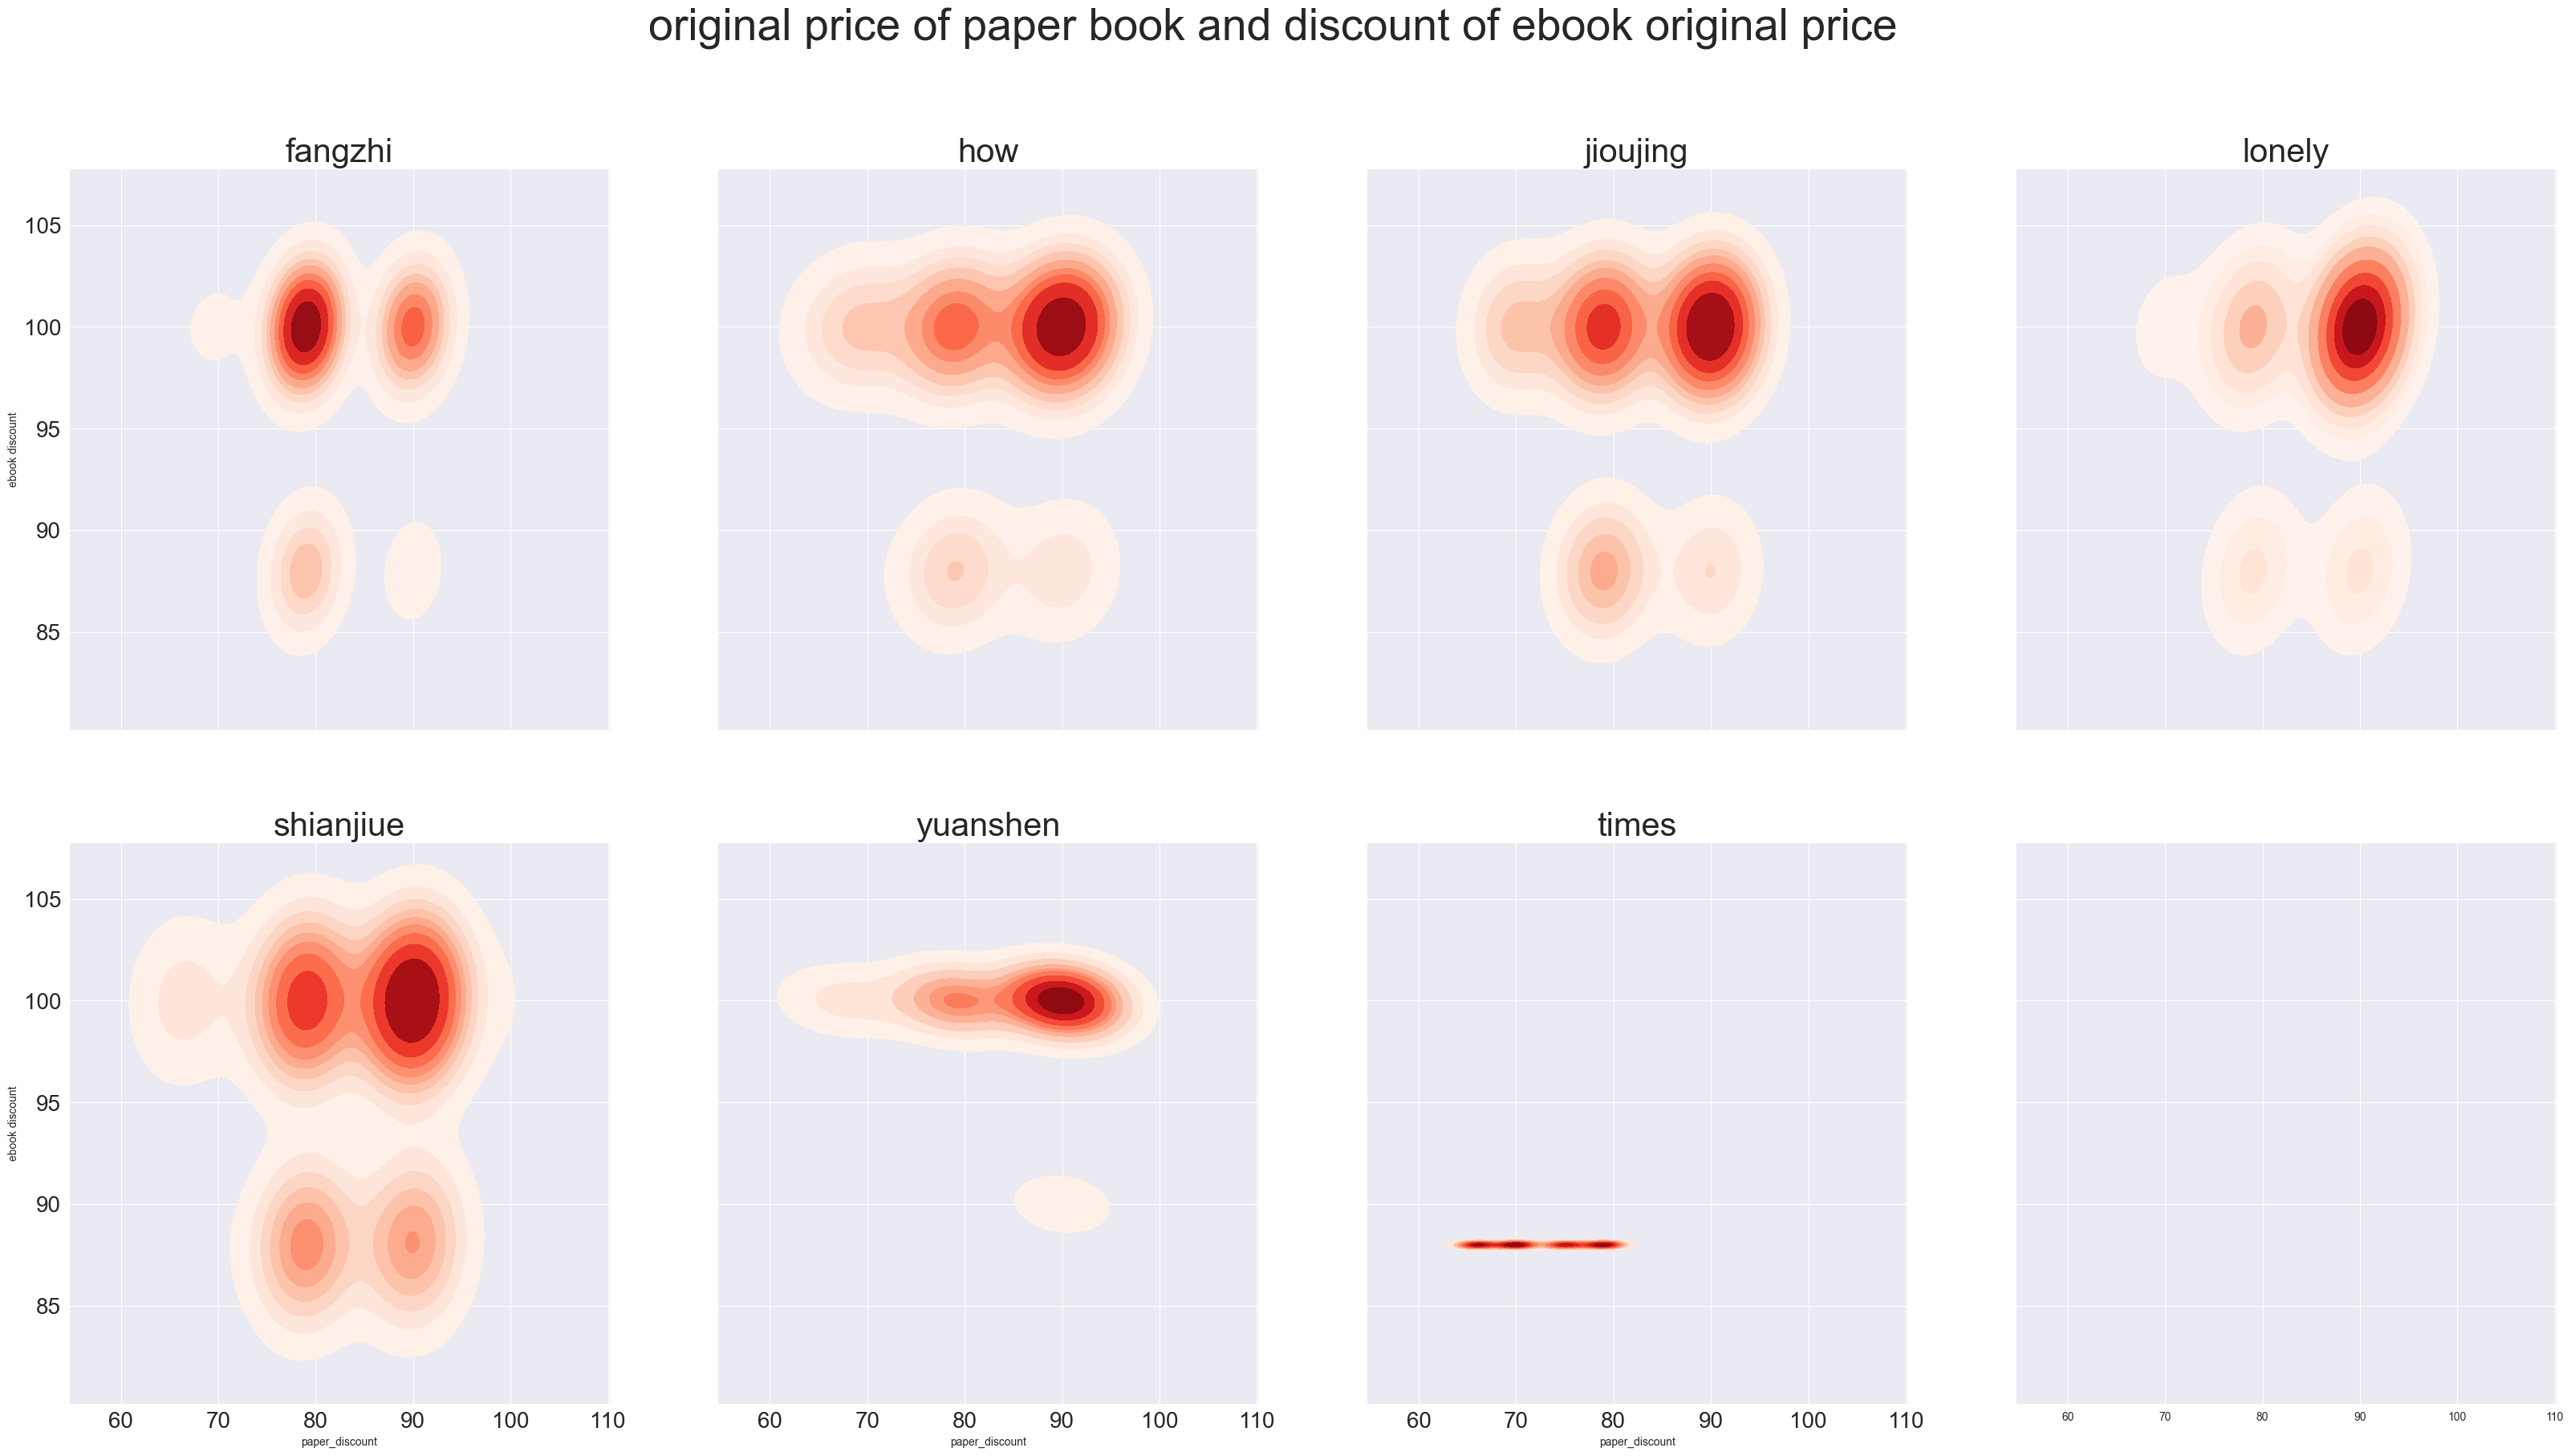

In [33]:
fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharex=True,sharey= True)
for i in range(7):
    sns.kdeplot(ebookdfs[i],x = 'paper_discount',y="discount", ax=axs[i//4, i%4],  cmap="Reds", fill=True)
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20) 
    axs[i//4,i%4].set_ylabel("ebook discount")
fig.suptitle('original price of paper book and discount of ebook original price', fontsize=40)
plt.savefig("./pics/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_kdeplot.png")

In [34]:
over = []

for i in range(7):
    mask1 = ebookdfs[i]['discount_rate_of_ebook_in_origion']>=100
    over.append(ebookdfs[i][mask1])
    
over_ = pd.DataFrame()
for i in over:
    over_ = pd.concat([over_,i],axis=0)

In [35]:
over_ = over_.reset_index(drop=True)[['title','original_price','price','discount','paper_original_price','paper_price','paper_discount']]

In [36]:
over_.columns = ['title',"ebook_original_price",'ebook_price','ebook_discount','paper_original_price','paper_price','paper_discount']

In [37]:
mask = over_['ebook_price'] <= over_['paper_price']
over_[mask]

,title,ebook_original_price,ebook_price,ebook_discount,paper_original_price,paper_price,paper_discount
0,100億的教訓：你所不知道的電子商務,260.0,234,90,260.0,234,90.0
1,捨得：電子業先驅邱再興的事業與志業,310.0,279,90,310.0,279,90.0
2,電子情師,190.0,171,90,190.0,171,90.0


In [38]:
over_

,title,ebook_original_price,ebook_price,ebook_discount,paper_original_price,paper_price,paper_discount
0,100億的教訓：你所不知道的電子商務,260.000000,234,90,260.000000,234,90.0
1,捨得：電子業先驅邱再興的事業與志業,310.000000,279,90,310.000000,279,90.0
2,電子情師,190.000000,171,90,190.000000,171,90.0
3,先知,265.909091,234,88,149.367089,118,79.0
4,普瓦蘭麵包之書,664.772727,585,88,550.000000,385,70.0
5,大亨小傳,251.136364,221,88,198.734177,157,79.0


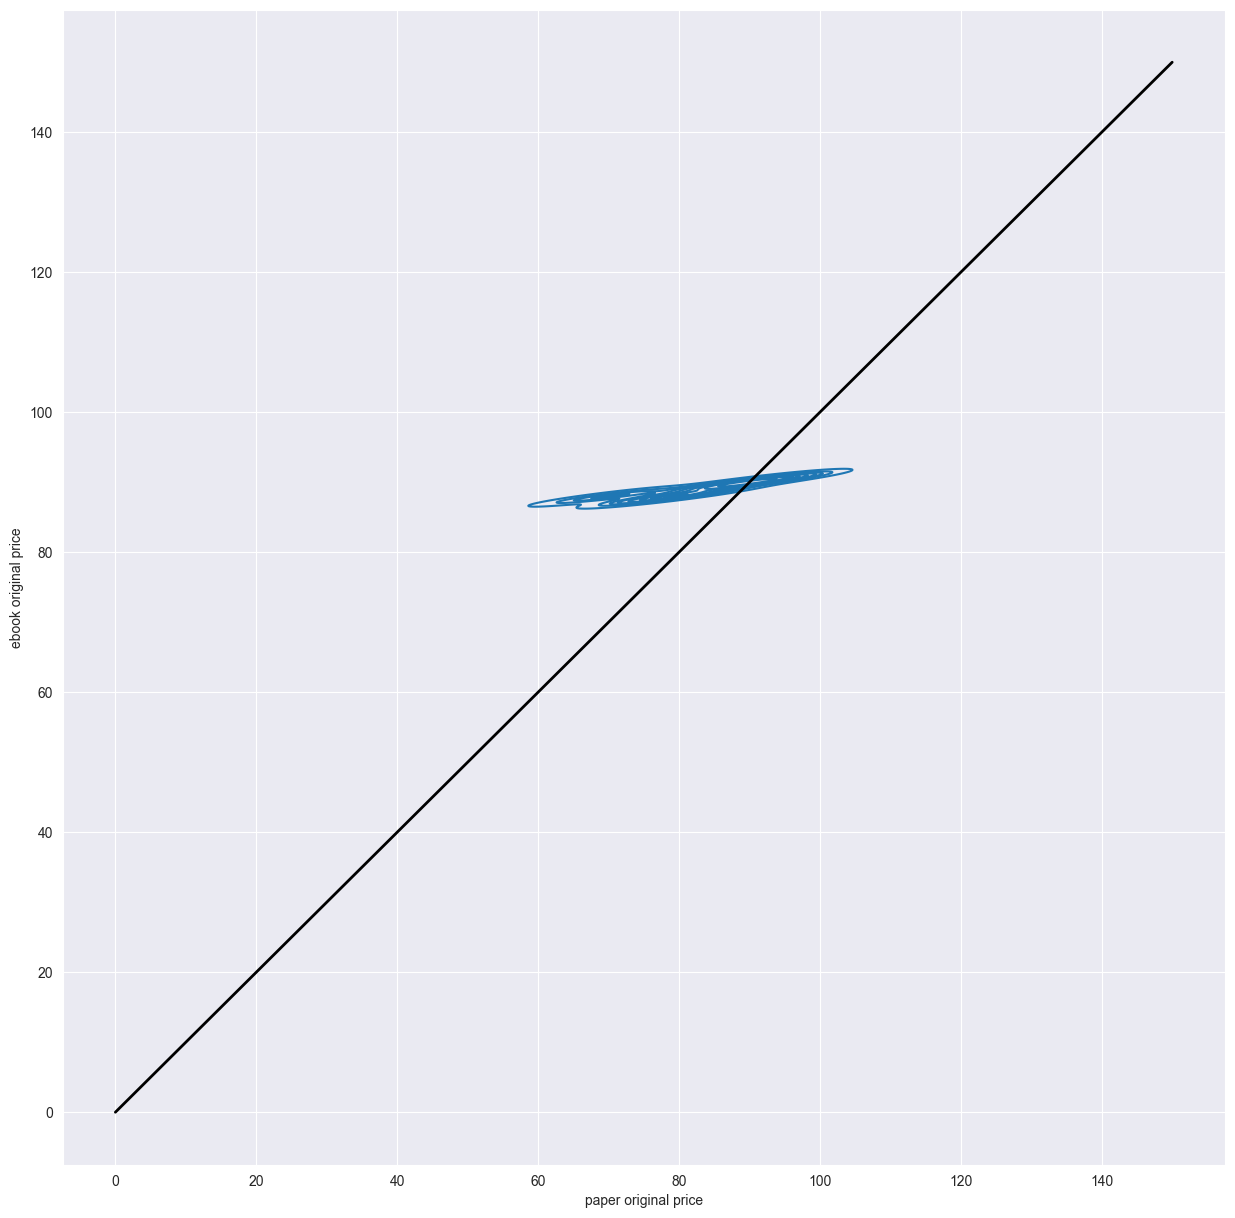

In [39]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
scatter = sns.kdeplot(data = over_,y  = 'ebook_discount',x = 'paper_discount')
plt.xlabel("paper original price")
plt.ylabel("ebook original price")
#draw 45 degree line
plt.plot([0, 150], [0, 150], 'k-', lw=2)
plt.savefig("./pics/ebook_paper_price_original.png")

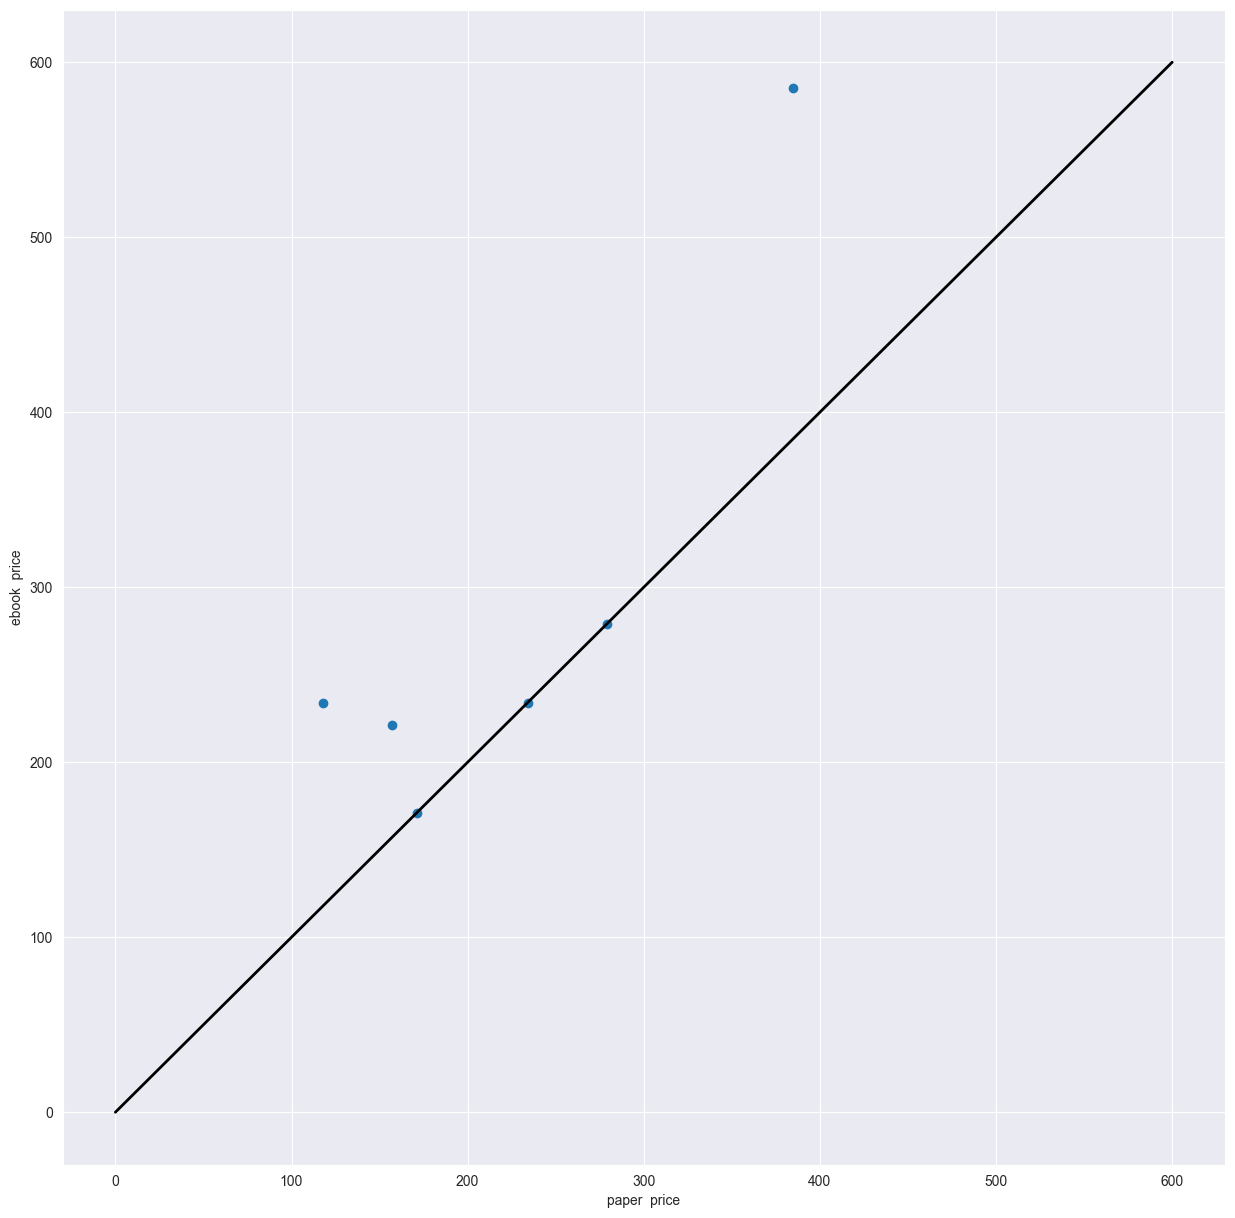

In [40]:

fig,ax = plt.subplots(1,1,figsize=(15,15))
scatter = plt.scatter(y = over_['ebook_price'].astype(int),x = over_['paper_price'].astype(int))
plt.xlabel("paper  price")
plt.ylabel("ebook  price")
#draw 45 degree line
plt.plot([0, 600], [0, 600], 'k-', lw=2)
plt.savefig("./pics/ebook_paper_price.png")